# 0. Session config

In [9]:
import numpy as np

import pandas as pd
pd.options.display.max_columns = 50

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import operator

# 1. General characteristic.

In [17]:
# Import data-set, with replacing 'yes' & 'false' values (in radiation & detention columns) on bool values
data = pd.read_csv('housing.csv',true_values=['yes'], false_values=['no']) 

# Replacing Y-column into the start for our all convenience
cols = list(data.columns.values)
cols.remove('price_doc')
cols.insert(0,'price_doc')
data = data[cols]

# Printing Data's size
print(f"Num of rows: {len(data)}, Num of cols: {data.shape[1]}")

Num of rows: 8894, Num of cols: 36


In [13]:
# Some data sample
data.head(10)

,price_doc,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,radiation,detention,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000
0,5150000,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,0.125882,0.458174,4,4,1,5,1,False,False,9604,61600,16509,4533,4439,3.804244,2.563223,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0
1,5980000,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,0.015900,0.051942,2,2,2,0,7,False,False,8583,35405,14007,4119,4017,1.721190,0.705344,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0
2,4600000,41,20.0,11.0,14.0,panel,1989.0,1.0,8.0,Krjukovo,1.084231e+07,0.062172,0.161532,6,6,2,4,1,False,False,12194,58114,14911,5767,5648,29.929680,23.241906,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0
3,5650000,38,19.0,6.0,17.0,panel,1986.0,1.0,8.0,Brateevo,7.587523e+06,0.398794,0.000000,6,6,0,5,0,True,False,12551,69792,20247,6273,5562,3.330545,1.173805,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0
4,9300000,58,37.0,3.0,9.0,panel,1968.0,3.0,6.0,Novogireevo,4.395333e+06,0.063755,0.038693,4,4,2,5,1,True,False,13523,56908,24130,6120,6533,0.584636,0.454650,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4
5,11000000,63,46.0,5.0,9.0,panel,1968.0,4.0,5.0,Horoshevo-Mnevniki,1.803644e+07,0.232080,0.111627,4,5,2,3,8,True,True,24814,100601,41388,10955,12238,3.067914,2.000012,23.678588,1.973216,6.201052,9.209931,10.77,1.76,2,3,0
6,5200000,32,18.0,5.0,9.0,panel,1968.0,1.0,6.0,Rostokino,3.497819e+06,0.146941,0.210473,1,2,3,0,2,False,False,5074,22837,9591,2334,2398,2.075227,0.610413,7.324954,0.610413,6.270761,9.662435,21.20,30.21,2,2,2
7,5800000,37,19.0,12.0,14.0,breezeblock,1975.0,1.0,9.0,Veshnjaki,1.051837e+07,0.334905,0.012339,6,7,2,4,1,False,False,11729,74032,33184,5208,5776,3.630751,2.402202,28.826423,2.402202,0.723894,13.012073,4.29,0.49,0,2,0
8,3000000,41,17.0,16.0,25.0,panel,2010.0,1.0,10.0,Chertanovo Central'noe,6.879020e+06,0.061477,0.282798,5,5,0,6,2,False,False,16719,68254,27248,7104,8667,3.499965,2.085077,24.894623,2.074552,3.327837,15.268712,45.92,0.00,0,0,0
9,3000000,60,36.0,5.0,7.0,brick,1995.0,2.0,10.0,Poselenie Voskresenskoe,2.149409e+07,0.262459,0.017647,0,0,0,0,0,False,False,1021,4568,1533,489,469,7.185351,5.323021,57.795651,4.816304,8.375744,26.427322,14.75,5.58,0,0,0


In [16]:
# Looking what data types we have
dtypes = data.dtypes

# Creating df to make it pleasant to the eye
dtypes_df = pd.DataFrame({'Columns': dtypes.index, 'Dtype': dtypes.values})
dtypes_df

,Columns,Dtype
0,price_doc,int64
1,full_sq,int64
2,life_sq,float64
3,floor,float64
4,max_floor,float64
5,material,object
6,build_year,float64
7,num_room,float64
8,kitch_sq,float64
9,sub_area,object


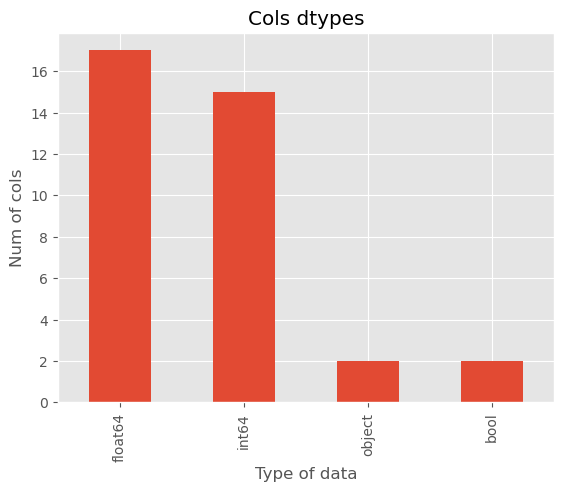

In [19]:
# Column distribution by types of data
dtypes.value_counts().plot(kind='bar')
plt.title('Cols dtypes')
plt.xlabel('Type of data')
plt.ylabel('Num of cols')
plt.show()

In [20]:
# Some descriptive statistics
data.describe()

,price_doc,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000
count,8.894000e+03,8894.000000,8894.000000,8894.000000,8894.000000,8859.000000,8894.000000,8894.000000,8.894000e+03,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8883.000000,8883.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000
mean,7.807093e+06,51.724196,30.417248,6.733303,12.186755,1974.139745,1.952665,7.716101,1.108296e+07,0.189023,0.127519,5.095120,5.946256,1.743423,4.862941,7.382617,14133.977625,69035.969080,24949.562064,6506.230155,6760.512368,3.878726,2.776304,31.475028,2.622919,5.531550,13.630503,14.796778,8.982299,2.933101,2.072296,0.360243
std,5.024875e+06,20.039067,13.506626,4.800781,5.639183,115.094557,0.862990,2.818154,1.051812e+07,0.161092,0.122523,2.649712,3.015129,1.511100,4.105298,16.671204,7499.271182,31818.820787,10869.045111,3469.111148,3607.526395,5.486074,4.725993,54.975459,4.581288,4.445240,7.044961,12.579365,12.022843,7.307584,2.235402,1.239451
min,1.000000e+05,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.081628e+06,0.001879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000,1633.000000,548.000000,175.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.093326,0.072897,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.450861e+06,38.000000,19.000000,3.000000,9.000000,1966.000000,1.000000,6.000000,5.686537e+06,0.063755,0.033494,4.000000,4.000000,1.000000,2.000000,1.000000,9647.000000,49242.000000,17508.000000,4533.000000,4625.000000,1.614015,0.935593,9.904819,0.825402,2.315584,9.296152,5.440000,0.000000,0.000000,0.000000,0.000000
50%,6.950000e+06,45.000000,29.000000,5.000000,12.000000,1976.000000,2.000000,8.000000,8.464344e+06,0.133373,0.090799,5.000000,6.000000,1.000000,4.000000,3.000000,12842.000000,65499.000000,25045.000000,5797.000000,5992.000000,2.380537,1.456320,16.265692,1.355474,4.402202,12.890028,10.630000,4.010000,1.000000,2.000000,0.000000
75%,9.200000e+06,60.000000,38.000000,9.000000,16.000000,1995.000000,3.000000,9.000000,1.249544e+07,0.300284,0.194489,6.000000,7.000000,3.000000,6.000000,6.000000,16719.000000,91795.000000,31147.000000,7753.000000,7976.000000,3.601120,2.285696,25.876968,2.156414,7.598405,15.808401,21.547500,13.400000,3.000000,3.000000,0.000000
max,8.077744e+07,275.000000,232.000000,77.000000,57.000000,4965.000000,17.000000,57.000000,2.060718e+08,0.852923,0.521867,13.000000,14.000000,6.000000,23.000000,141.000000,40692.000000,161290.000000,57086.000000,19223.000000,19083.000000,60.941737,74.579620,711.215806,59.267984,53.277832,70.738769,100.000000,72.200000,84.000000,20.000000,30.000000


In [7]:
data.describe(include='O')

,material,sub_area
count,8894,8894
unique,5,144
top,panel,Mar'ino
freq,5563,238


Well, with the max_floor = 57, someone lives on the 77th floor.

We`re gonna drop this values.

In [21]:
data.drop(data[data["floor"] > data["max_floor"]].index,inplace=True)

# 2. Processing values and preparing DATA for analysis and modeling.

## 2.1 Processing NaN values.

In [24]:
# Creating dataframe where we count num of nan values by columns
data_nan = pd.DataFrame(data.isna().sum(), columns=["Num of NaN values"])
data_nan = data_nan[data_nan["Num of NaN values"] > 0]

# Displaying the result
display(data_nan)

,Num of NaN values
build_year,35
metro_min_walk,11
metro_km_walk,11


In [23]:
# Looking for some outliers or wronk values
data['build_year'].describe().reset_index()

,index,build_year
0,count,8823.000000
1,mean,1974.133401
2,std,115.324932
3,min,0.000000
4,25%,1966.000000
5,50%,1976.000000
6,75%,1995.000000
7,max,4965.000000


---
You can immediately notice the presence of errors and incorrect data for this column:
* The minimum value is zero
* The maximum value is 4965
* A certain number of missing values

### 2.1.1 Missed years

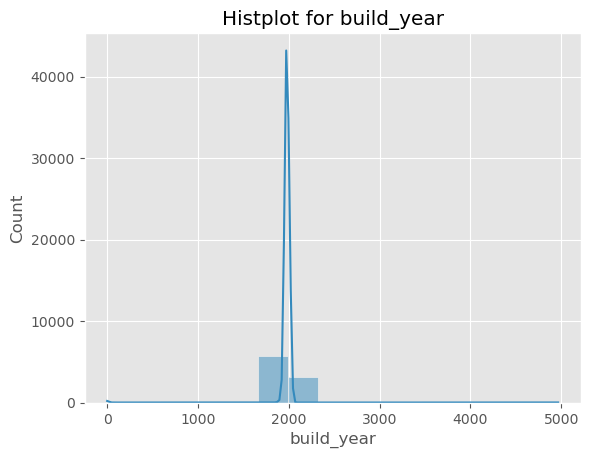

In [26]:
# Gonna look for this distribution
sns.histplot(data['build_year'], kde=True,bins = 15)
plt.title("Histplot for build_year")
plt.show()

---
It can be seen that these error-values strongly affect both the perception and the perspectives of our work.

To solve this problem -
* We will determine the minimum year of construction, based on the construction material;
* The values below and above these restrictions will be replaced by the average value of the year of construction by material;
* The use of quantiles here will not be quite correct - we will lose the truthful data below the quantile.

---
Let`s have a look at those 'wrong' values:
___

In [12]:
data[['build_year','material']].sort_values(by='build_year').head(30)

,build_year,material
1302,0.0,panel
7413,0.0,panel
1633,0.0,panel
868,0.0,panel
6397,0.0,panel
4012,1.0,panel
8289,1.0,panel
4550,1.0,panel
5823,1.0,mass concrete
3109,1.0,breezeblock


In [27]:
# Let's create a function to adjust the dataset relatively to the year of construction
def right_year(lower_year,upper_year,material):

    f1 = data['material'] == material # First filter
    f2 = (data['build_year'] >= lower_year) & (data['build_year'] <= upper_year) # Second filter
    real_data = data[f1 & f2] # Applying a filter and assigning to a separate df

    mean_val = round(real_data['build_year'].mean()) # Calculating mean value on correct data

    # Replacing values above and below thresholds with average values of the year of construction among other buildings with this material
    data.loc[data['material'] == material,'build_year'] = data['build_year'].apply(lambda x: mean_val if (x < lower_year or x > upper_year or pd.isna(x)) else x)

---
* The first panel house in the USSR was built after the war in 1948 in Moscow,
* For the first time, large-scale cinder blocks in Russia began to be used in 1927+,
* The use of cement began a long time ago so that buildings were lower than other, normal minimum values, so we will replace them with average values based on the available data,
    * And we will select the lower border in a manual format from a sample sorted by year;
* The use of bricks started too long ago for buildings to be lower than other, normal minimum values, so we will replace them with average values based on the available data,
    * And we will select the lower bound in a manual format from a sample sorted by year.

In [29]:
# Applying function to:
right_year(1948,2023,'panel') # panel buildings
right_year(1927,2023,'breezeblock') # breezeblock (UK) / cinderblock (NA) buildings
right_year(1965,2023,'mass concrete') # concrete buildings
right_year(1967,2023,'mass concrete plus brick') # concrete + brick buildings
right_year(1876,2023,'brick') # brick buildings

---
The conversion is done, we should get correct data now.
___

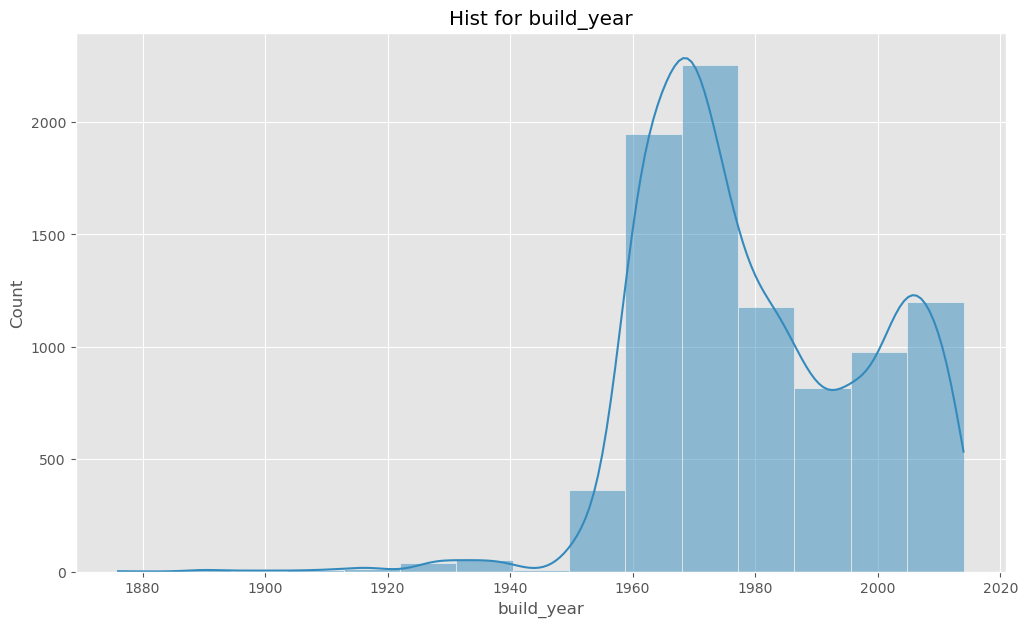

In [30]:
plt.figure(figsize=(12, 7))
sns.histplot(data['build_year'], kde=True,bins = 15)
plt.title("Hist for build_year")
plt.show()

In [31]:
# We`re replacing build year on age of the building, so we can correctly use it in our regression model
data['age'] = 2023 - data['build_year']
data.drop(columns=['build_year'], inplace=True)

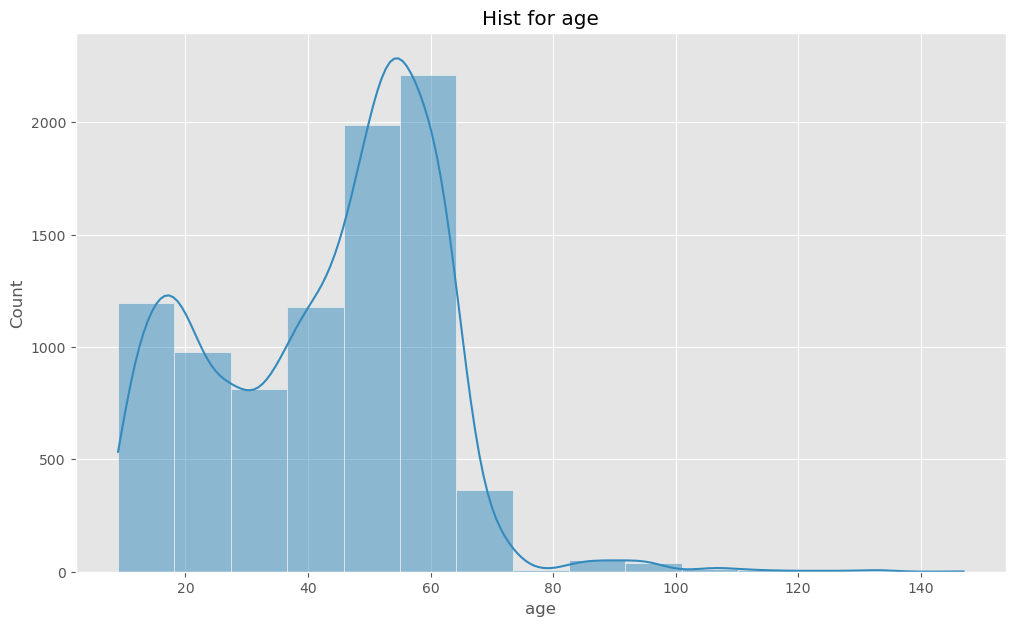

In [35]:
# It must be fully symmetrical to the previous histplot
plt.figure(figsize=(12, 7))
sns.histplot(data['age'], kde=True,bins = 15)
plt.title("Hist for age")
plt.show()

### 2.1.2 Handling missing values related to the subway-related factors (Metro in Russian).

In [33]:

# Replacing "NaN" with median values in 'metro_min_walk'
data['metro_min_walk'].fillna(data.groupby('sub_area')['metro_min_walk'].transform('median'), inplace=True)

# Replacing "NaN" with median values in 'metro_km_walk'
data['metro_km_walk'].fillna(data.groupby('sub_area')['metro_km_walk'].transform('median'), inplace=True)


In [34]:
# Creating yet another df to look into NaN values
data_nan = pd.DataFrame(data.isna().sum(), columns=["Num_of_NaN_value"])
data_nan = data_nan[data_nan["Num_of_NaN_value"] > 0]

# Displaying result
display(data_nan)

,Num_of_NaN_value


---
As we can see, the handling was succesful.
___

# 3. Visualisation.

## 3.1 One-dimensional data analysis.

In [37]:
numeric_cols = data.select_dtypes(include=['int', 'float', 'bool'])

In [38]:
numeric_cols.head()

,price_doc,full_sq,life_sq,floor,max_floor,num_room,kitch_sq,area_m,green_zone_part,indust_part,preschool,school,healthcare,shopping,office,radiation,detention,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,age
0,5150000,38,18.0,1.0,14.0,1.0,9.0,7.126815e+06,0.125882,0.458174,4,4,1,5,1,False,False,9604,61600,16509,4533,4439,3.804244,2.563223,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,52.0
1,5980000,41,17.0,14.0,16.0,1.0,10.0,2.641243e+06,0.015900,0.051942,2,2,2,0,7,False,False,8583,35405,14007,4119,4017,1.721190,0.705344,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,45.0
2,4600000,41,20.0,11.0,14.0,1.0,8.0,1.084231e+07,0.062172,0.161532,6,6,2,4,1,False,False,12194,58114,14911,5767,5648,29.929680,23.241906,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,34.0
3,5650000,38,19.0,6.0,17.0,1.0,8.0,7.587523e+06,0.398794,0.000000,6,6,0,5,0,True,False,12551,69792,20247,6273,5562,3.330545,1.173805,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,37.0
4,9300000,58,37.0,3.0,9.0,3.0,6.0,4.395333e+06,0.063755,0.038693,4,4,2,5,1,True,False,13523,56908,24130,6120,6533,0.584636,0.454650,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,55.0


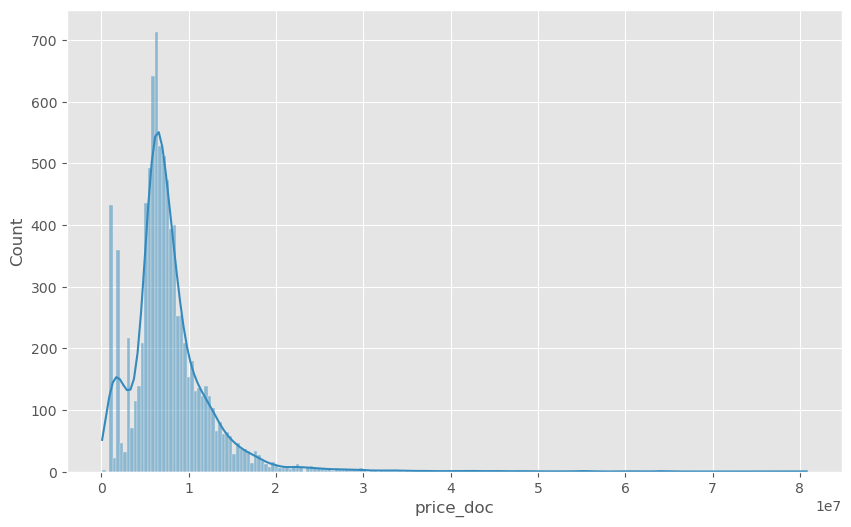

In [39]:
# Let's build a histogram to look into Y distribution 
plt.figure(figsize=(10, 6))
sns.histplot(numeric_cols['price_doc'], kde=True,bins = 200)
plt.show()

In [40]:
numeric_cols['price_doc'].skew()

3.5093394758544054

It can be seen both by the schedule and by the coef. asymmetry, that the distribution is right-sided asymmetric.

Let's try to catch the value of the outliers.

In [41]:
data.loc[data['price_doc'] < 4000000,'price_doc'].mode()

0    2000000
Name: price_doc, dtype: int64

In [42]:
data = data[data.price_doc > 2000000]

As we don't know why there are so many appartments with price = 20 000 $: we're gonna drop them as mistakes / etc.

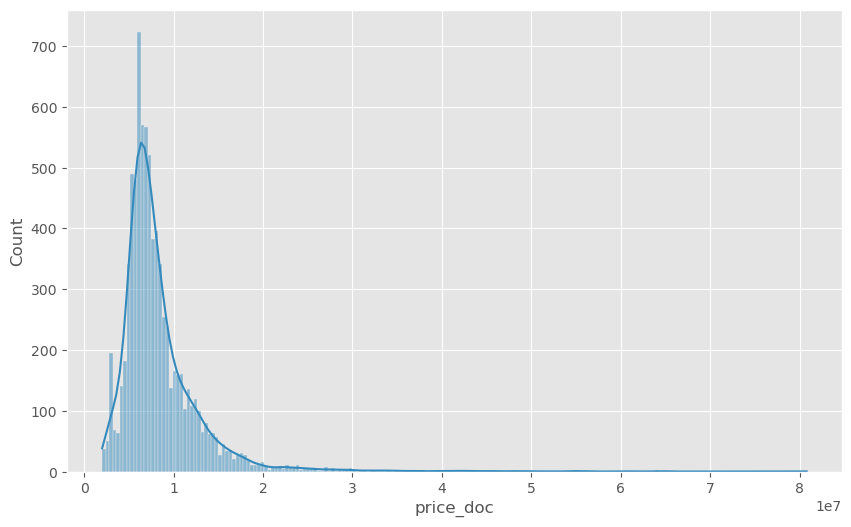

In [43]:
# Let`s look into that again
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc'], kde=True,bins = 200)
plt.show()

In [44]:
# We`re gonna drop small part of outliers for the sake of our model.
Q1 = data['price_doc'].quantile(0.05)
Q3 = data['price_doc'].quantile(0.95)

# Calculating IQR
IQR = Q3 - Q1

# Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Dropping spare rows
data = data[(data['price_doc'] >= lower_bound) & (data['price_doc'] <= upper_bound)]

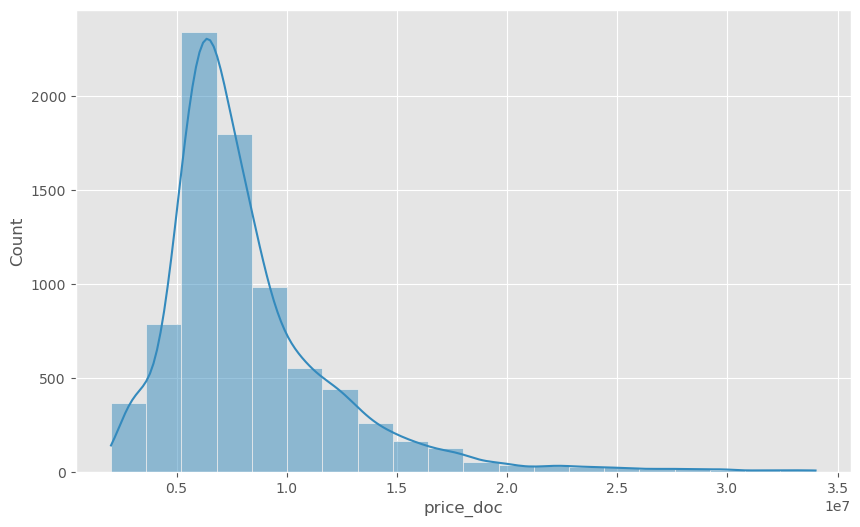

In [45]:
# Again with the histplot
plt.figure(figsize=(10, 6))
sns.histplot(data['price_doc'], kde=True,bins = 20)
plt.show()

The situation has become little more normal.

## 3.2 Multidimensional data analysis.

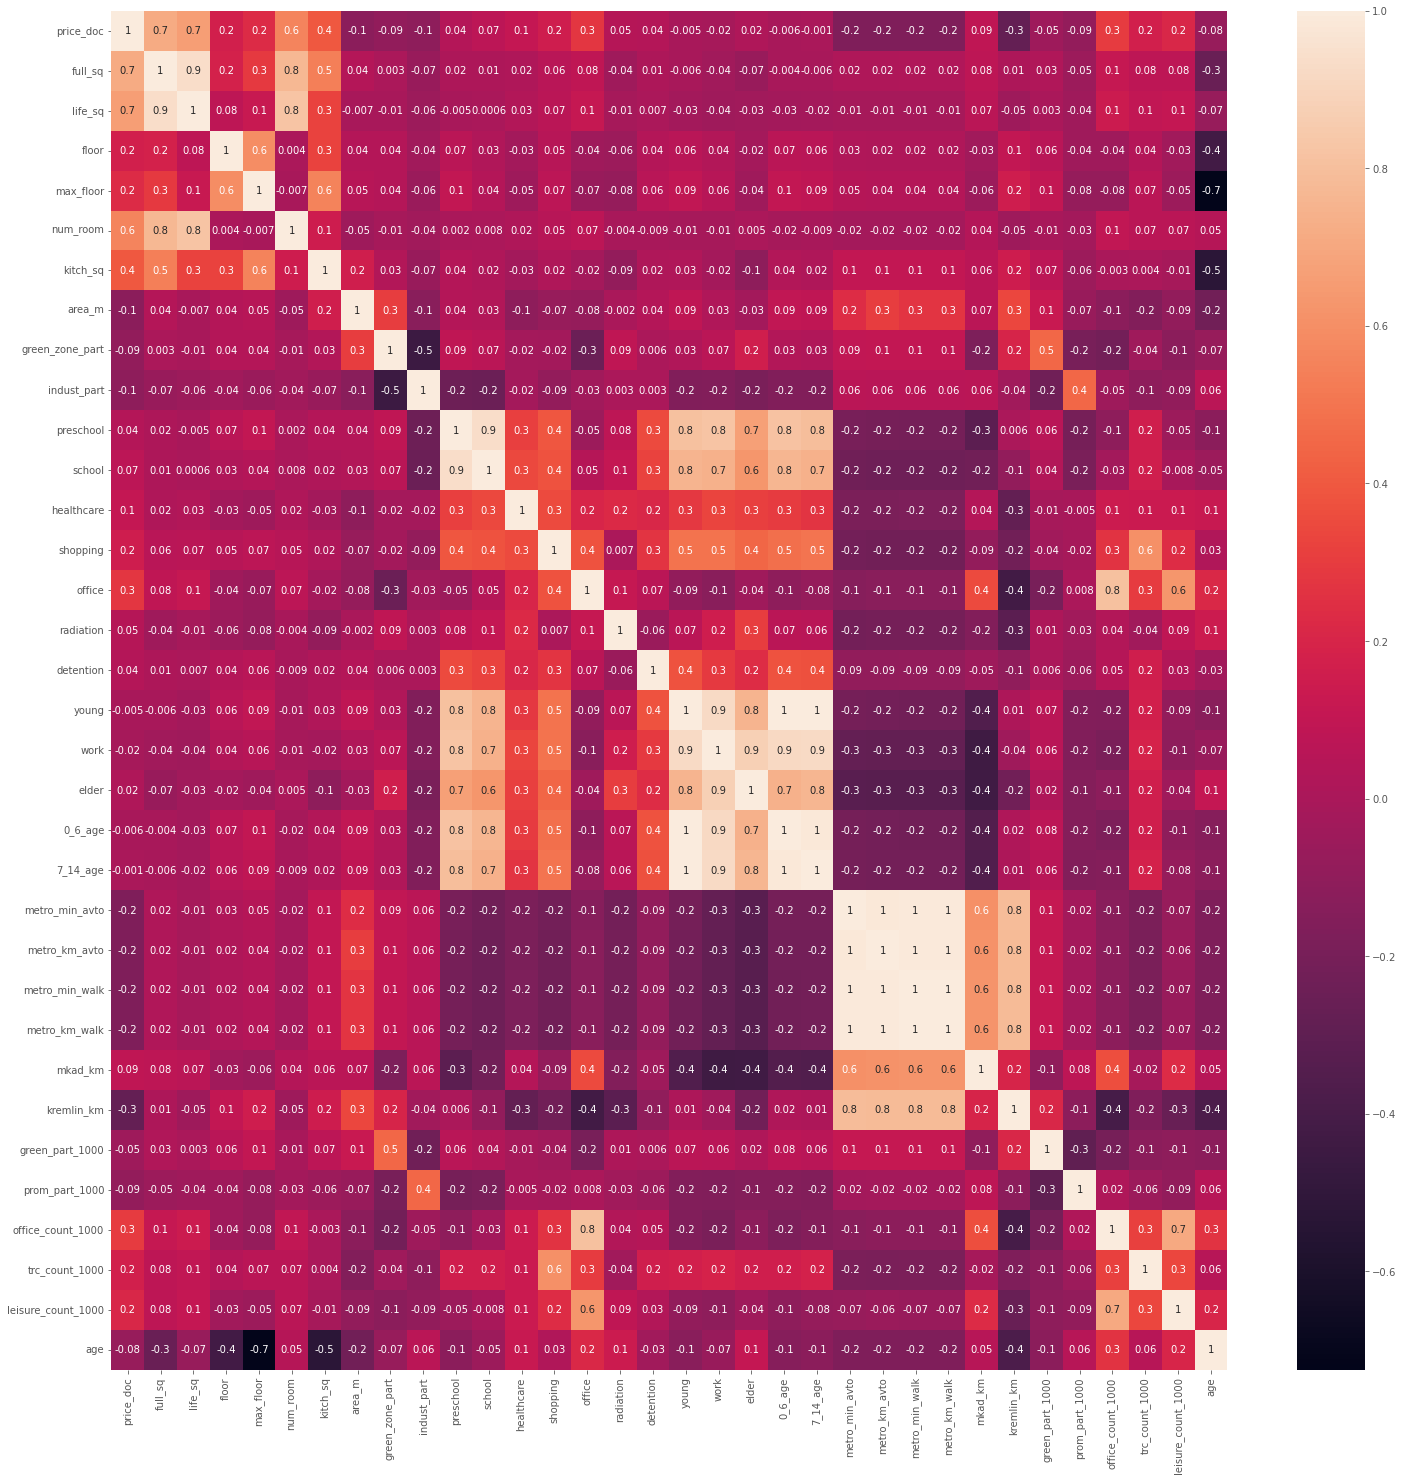

In [30]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

Intermediate conclusions:
The greatest correlation with the resulting feature ['price_doc'] is shown by the signs: 
* full_sq - the quadrature of the apartment and the life_sq and kitch_sq correlating with it
* office - number of offices in the area

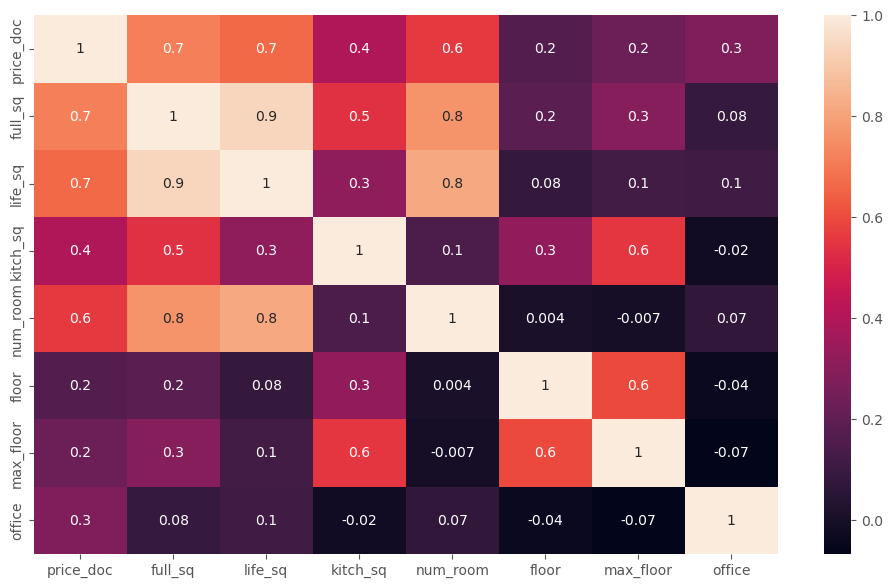

price_doc:PearsonRResult(statistic=1.0, pvalue=0.0)
full_sq:PearsonRResult(statistic=0.715074475175546, pvalue=0.0)
life_sq:PearsonRResult(statistic=0.6625808281442827, pvalue=0.0)
kitch_sq:PearsonRResult(statistic=0.39577627219372224, pvalue=7.739351158061333e-299)
num_room:PearsonRResult(statistic=0.558513434239691, pvalue=0.0)
floor:PearsonRResult(statistic=0.16483990707063395, pvalue=6.182621255075659e-50)
max_floor:PearsonRResult(statistic=0.2285423004522118, pvalue=1.7214824645031612e-95)
office:PearsonRResult(statistic=0.27504494971175597, pvalue=4.140901983517759e-139)


In [47]:
cor_list_1 = ['price_doc','full_sq','life_sq','kitch_sq','num_room','floor','max_floor','office']

plt.figure(figsize=(12, 7))
sns.heatmap(data[cor_list_1].corr(),annot = True, fmt='.1g')
plt.show()

for i in cor_list_1:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

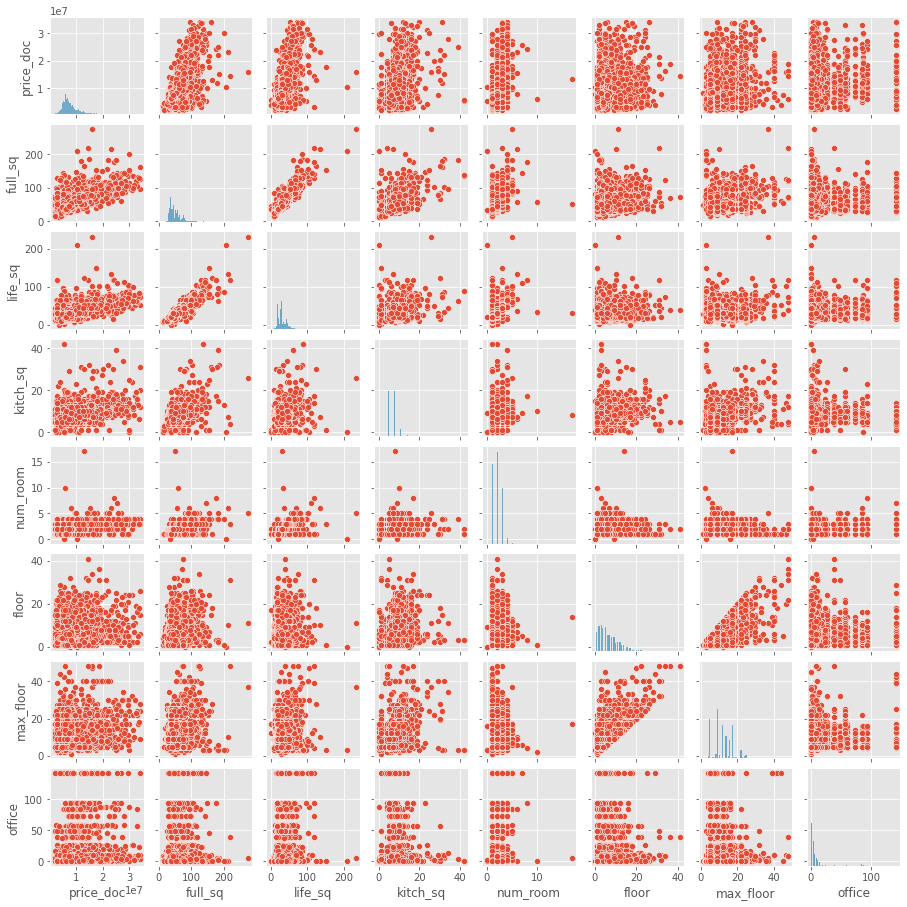

In [32]:
help_data = data[cor_spis_1]
sns.pairplot(help_data, height=1.6)

As you can see, all these selected parameters have a correlation. the relationship with the Y, but let's pay attention to num_room, floor / max_floor, life_sq, kitch_sq.

In addition, it is worth paying attention to the strong interfacial correlation between this parameters.

In this case, we will need to select more parameters that can be used to build the model.

# 4. SELECTION OF ADDITIONAL PARAMETERS.

Considering that the other parameters available in our dataset show an interfacial correlation - it is good reason to create a coefficient, with weights, to increase the accuracy of the model.

Best ideas:
* Data on the attractiveness of the area (at first it was coef, but it didn't work)
* Average cost per square meter in the district / Average cost by district
* * Since it would be incorrect to use just the cost of a square meter in an apartment - with such data available, we will not need a model
* Transport system data
* Attractiveness score of the 1 km radius from the flat.

---

* Coefficient of quality of the house
* * At the stages of preliminary analysis and construction of trial charts, it was decided not to include this indicator, due to the lack of significance.
* Infrastructure sufficiency Coefficient
* * At the stages of preliminary analysis and construction of trial charts, it was decided not to include this indicator, due to the lack of significance.

## 4.1. District-attractiveness data 

In [49]:
district_cols = ['area_m','green_zone_part','indust_part','preschool','school','healthcare','radiation','detention','young','work','elder','0_6_age','7_14_age','shopping','office']

In [50]:
district_cols_hist = ['area_m','green_zone_part','indust_part','preschool','school','healthcare','young','work','elder','0_6_age','7_14_age','shopping','office']

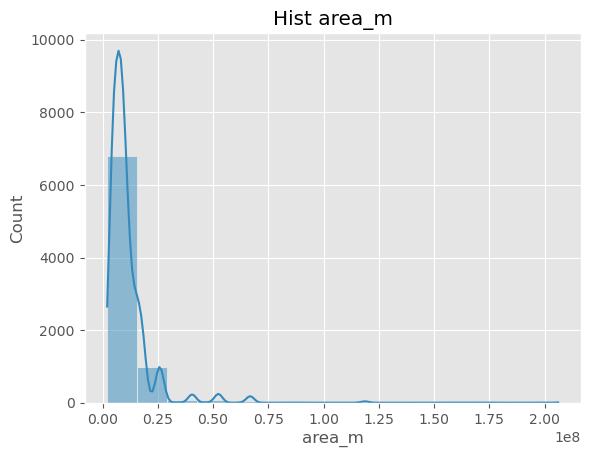

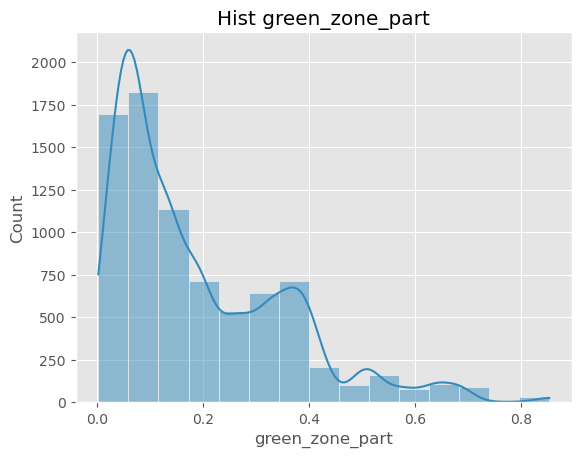

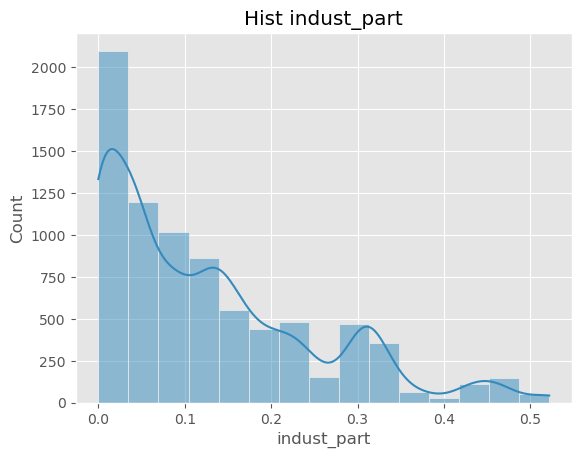

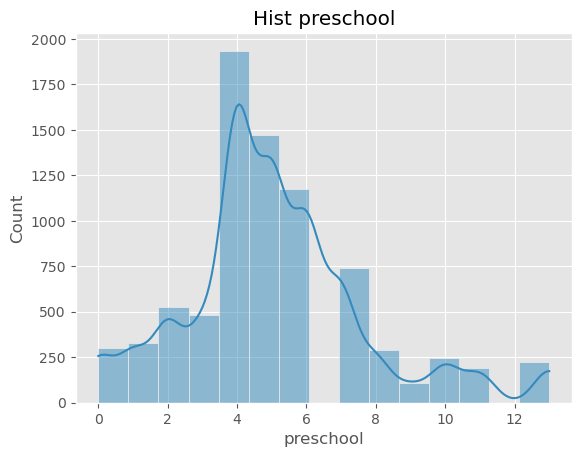

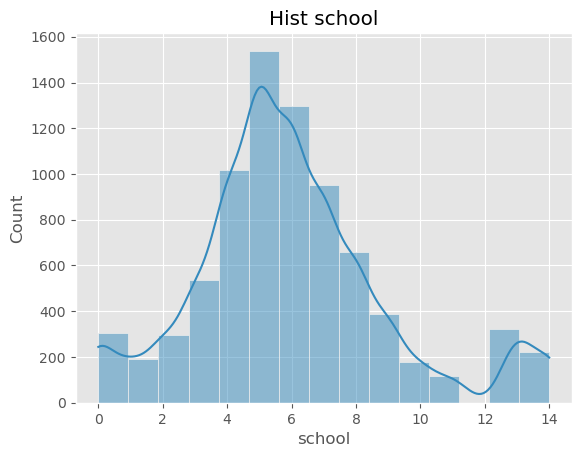

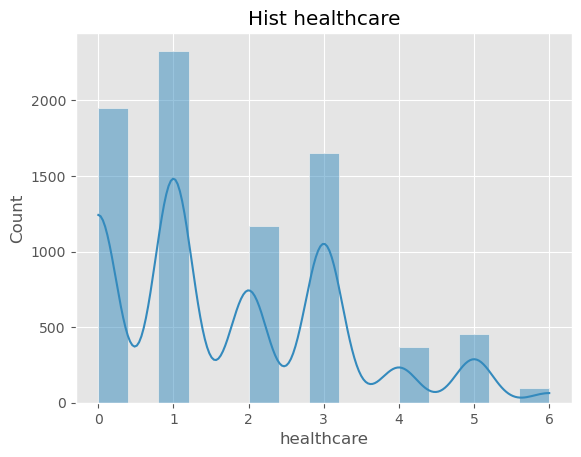

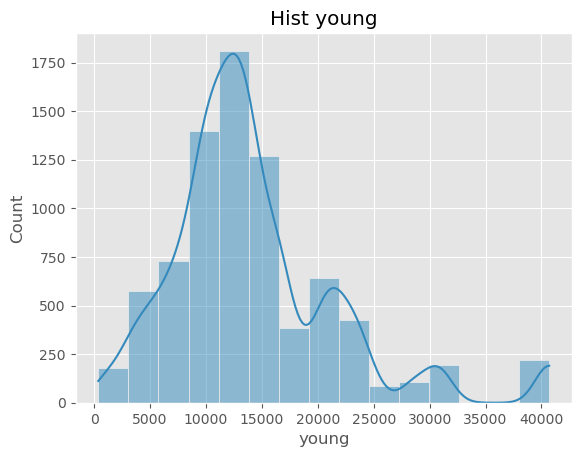

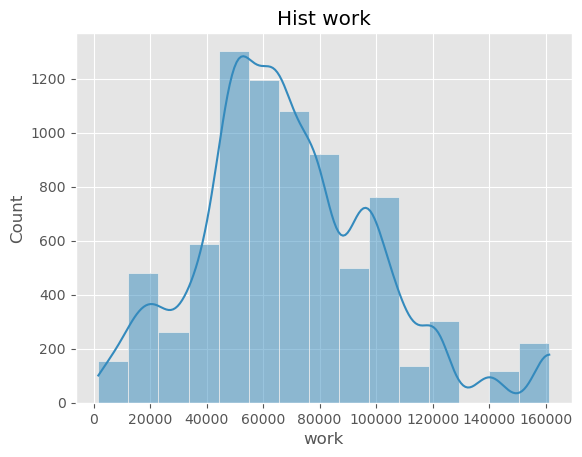

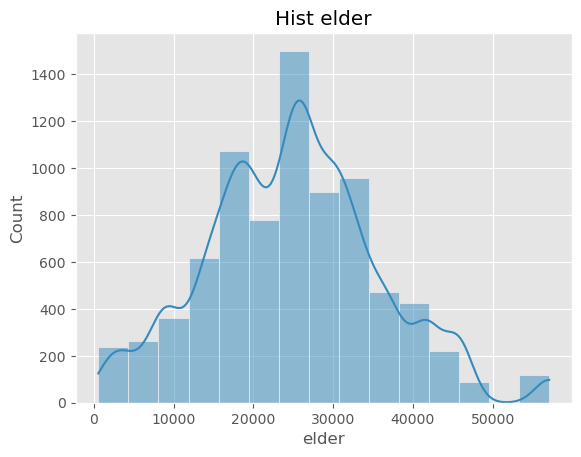

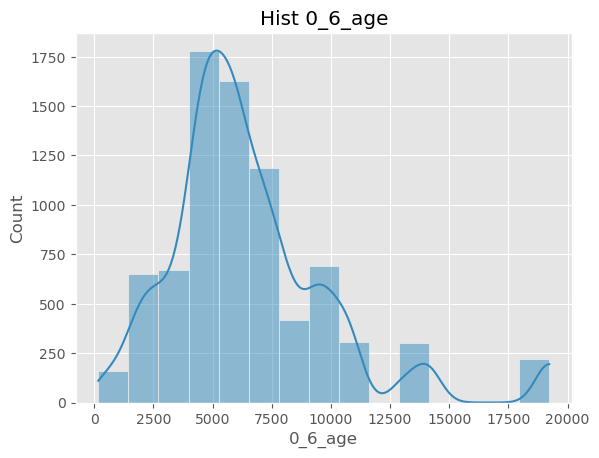

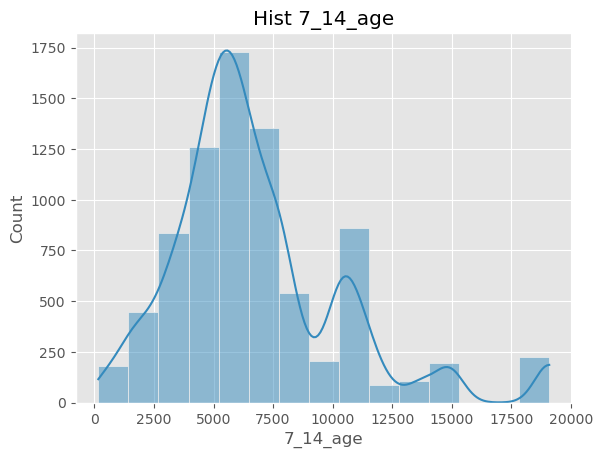

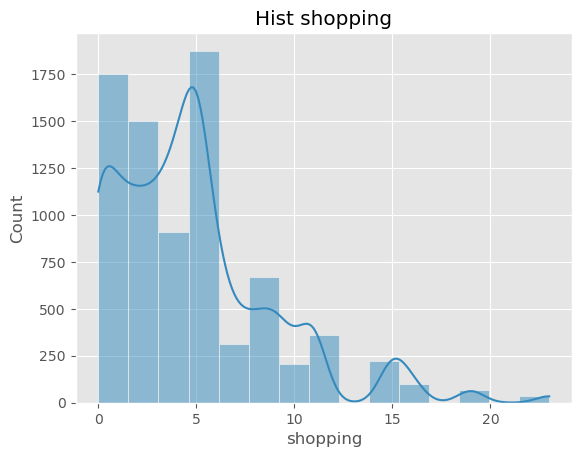

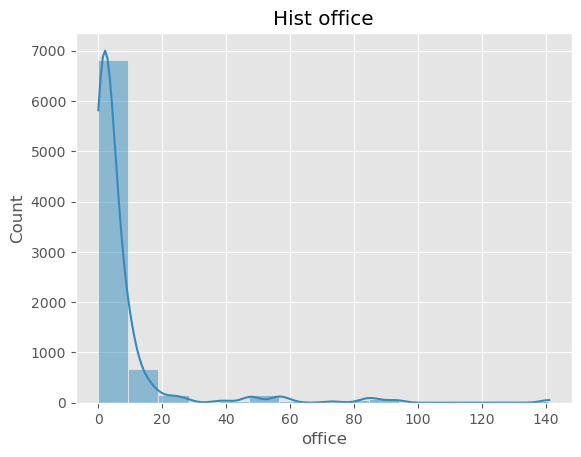

In [51]:
for column in district_cols_hist:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Hist {column}")
    plt.show()

As you can see, not all the data here is distributed normally.

And when they are normalized, a significant part of the sample will be lost and regular indicators for most of these factors will be lost.

'As practice has shown, and the construction of a model based on such data'

However, some should be trimmed using quantiles.
* area_m
* office
* green_zone_part
* indust_part

In [52]:
data.shape[0]

8016

In [53]:
dis_norm = ['area_m','office','green_zone_part','indust_part']

In [54]:
for i in dis_norm:
    Q1 = data[i].quantile(0.05)
    Q3 = data[i].quantile(0.95)

    # IQR
    IQR = Q3 - Q1

    # Thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Row-dropping
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]


In [55]:
for i in district_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

area_m:PearsonRResult(statistic=-0.0964128710988553, pvalue=1.6367904337477735e-17)
green_zone_part:PearsonRResult(statistic=-0.06201324132794182, pvalue=4.482496183108425e-08)
indust_part:PearsonRResult(statistic=-0.09050139167394511, pvalue=1.321194597540805e-15)
preschool:PearsonRResult(statistic=0.02825969704016625, pvalue=0.012734064554342004)
school:PearsonRResult(statistic=0.05360067691428472, pvalue=2.2740242151388562e-06)
healthcare:PearsonRResult(statistic=0.07145314279508191, pvalue=2.873201091296541e-10)
radiation:PearsonRResult(statistic=0.01868584322265652, pvalue=0.0995598787988836)
detention:PearsonRResult(statistic=0.028995863598197107, pvalue=0.010587031946438496)
young:PearsonRResult(statistic=-0.013579771100417633, pvalue=0.23135065029589955)
work:PearsonRResult(statistic=-0.023385842942247086, pvalue=0.0392690661357199)
elder:PearsonRResult(statistic=0.0066677607125811625, pvalue=0.5567611346098935)
0_6_age:PearsonRResult(statistic=-0.011816583076904533, pvalue=0.2

In [56]:
data.shape[0]

7770

---
As we can see from the p-value, only a few parameters really have no correlation with the resulting feature.

We exclude unnecessary data.

We will also exclude preschool, young, elder, children and detention, as they show a strong interfacial correlation.
___

In [57]:
att_cols = ['area_m', 'indust_part', 'school', 'work', 'shopping', 'office']

In [58]:
set1 = set(district_cols)
set2 = set(att_cols)

res = set1 - set2

dis_rem_cols = list(res)

In [59]:
dis_rem_cols

['preschool',
 '7_14_age',
 'detention',
 'green_zone_part',
 'young',
 '0_6_age',
 'healthcare',
 'elder',
 'radiation']

In [60]:
data.drop(columns= dis_rem_cols,inplace = True)

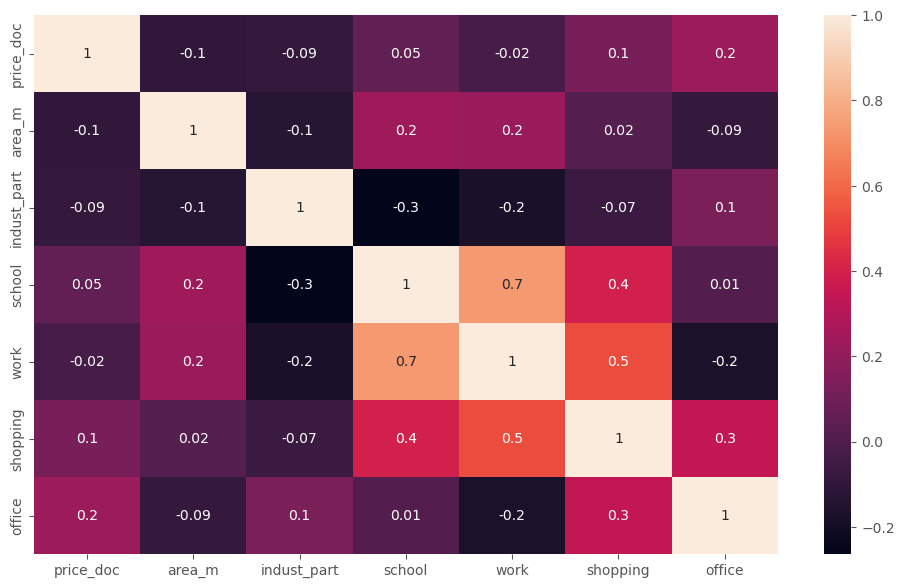

In [61]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc',*att_cols]].corr(),annot = True, fmt='.1g')
plt.show()

In [62]:
for i in att_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

area_m:PearsonRResult(statistic=-0.0964128710988553, pvalue=1.6367904337477735e-17)
indust_part:PearsonRResult(statistic=-0.09050139167394511, pvalue=1.321194597540805e-15)
school:PearsonRResult(statistic=0.05360067691428472, pvalue=2.2740242151388562e-06)
work:PearsonRResult(statistic=-0.023385842942247086, pvalue=0.0392690661357199)
shopping:PearsonRResult(statistic=0.12180268464294404, pvalue=4.516525197819331e-27)
office:PearsonRResult(statistic=0.2283309062813116, pvalue=1.907865781851559e-92)


---
The attributes of the attractiveness of the district are significant.
___

## 4.2. The coefficient of attractiveness of the kilometer radius around the apartment.

In [63]:
km_cols = ['green_part_1000','prom_part_1000','office_count_1000','trc_count_1000','leisure_count_1000']

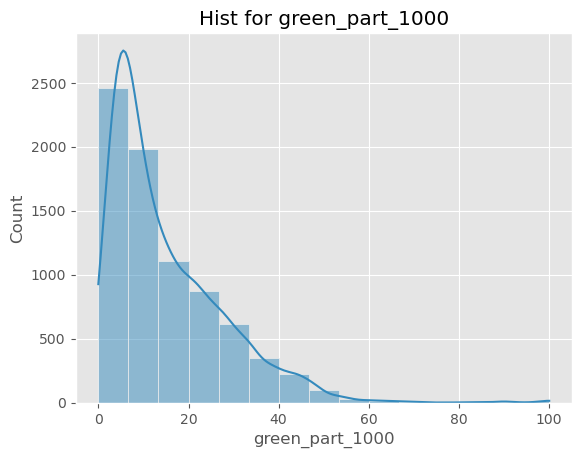

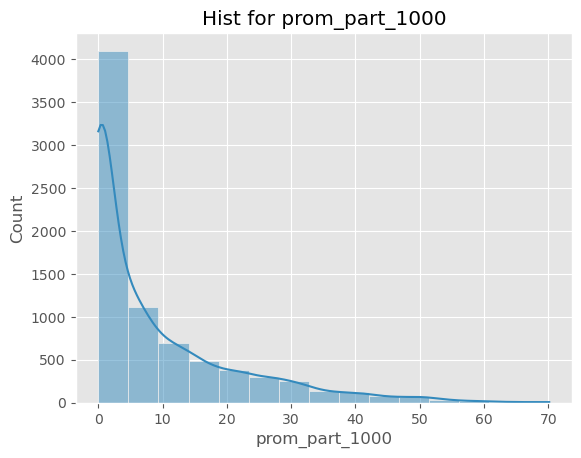

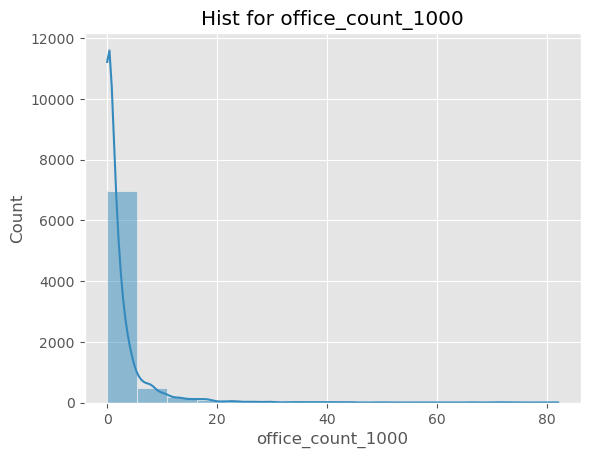

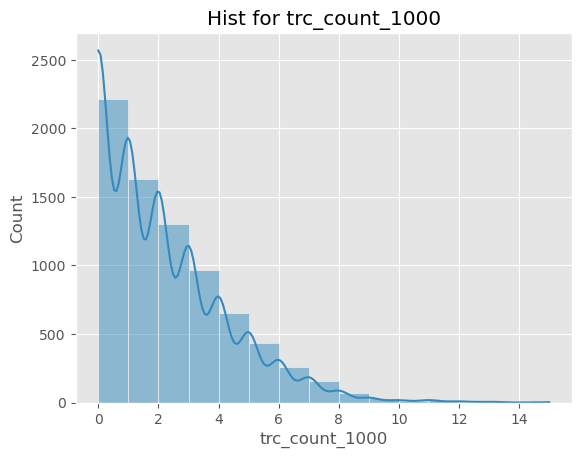

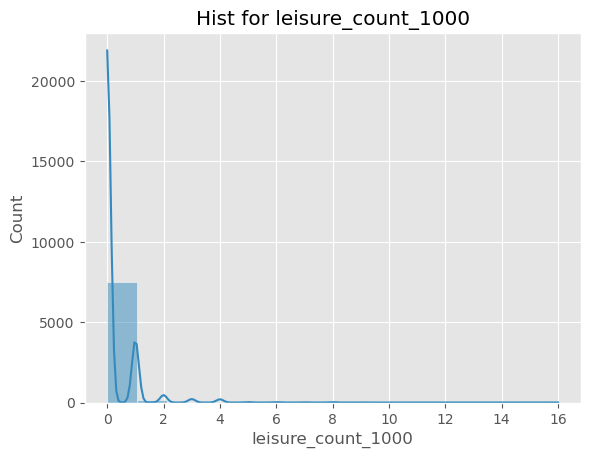

In [64]:
for column in km_cols:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Hist for {column}")
    plt.show()

The exclusion of zero and opposite minimum values would lead to a reduction in the sample and would not show the relationship between the price and kilometer radii where there is no shopping center, parks, etc.

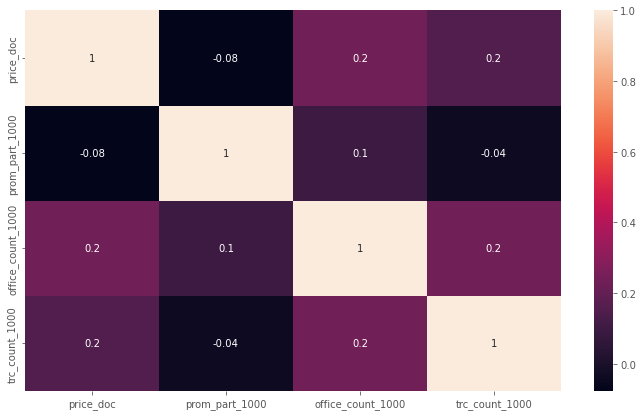

In [49]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc','prom_part_1000','office_count_1000','trc_count_1000']].corr(),annot = True, fmt='.1g')
plt.show()

Looks like we're gonna remove all indicators, since they show too weak correlation, and they also correlate with each other.

Instead, we will collect a new indicator, the coefficient. the attractiveness of a kilometer radius.

In [65]:
for i in km_cols:
    print(f"{i}:{pearsonr(data['price_doc'], data[i])}")

green_part_1000:PearsonRResult(statistic=-0.030524849471264638, pvalue=0.007126245064880028)
prom_part_1000:PearsonRResult(statistic=-0.0769400272580644, pvalue=1.113158948475659e-11)
office_count_1000:PearsonRResult(statistic=0.2380233954832836, pvalue=1.5827236218491962e-100)
trc_count_1000:PearsonRResult(statistic=0.15330106904637777, pvalue=4.50650962569774e-42)
leisure_count_1000:PearsonRResult(statistic=0.13371152458075497, pvalue=2.4935975554853155e-32)


In [66]:
df_2 = data.copy()

# Defying x-factors and Y-factor
X = df_2[['prom_part_1000','trc_count_1000','office_count_1000']]
y = df_2['price_doc']

# Some standartization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating regression-model
model_2 = LinearRegression()
model_2.fit(X_scaled, y)

# getting our weights
coefficients = model_2.coef_
print(coefficients,'\n')

# And some intercept
intercept = model_2.intercept_
print(intercept)

[-357619.31813447  364528.10147001  848215.55706969] 

8165852.267824967


In [67]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     211.5
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          6.90e-132
Time:                        03:48:18   Log-Likelihood:            -1.2839e+05
No. Observations:                7770   AIC:                         2.568e+05
Df Residuals:                    7766   BIC:                         2.568e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.166e+06   4.12e+04    198.159      0.0

In [68]:
km_col = ['prom_part_1000','trc_count_1000','office_count_1000']

In [69]:
data['km_score'] = intercept + (coefficients[0] * data[km_col[0]] + coefficients[1] * data[km_col[1]] +\
coefficients[2] * data[km_col[2]])

In [70]:
data.drop(columns= km_cols,inplace = True)

In [71]:
pearsonr(data['price_doc'], data['km_score'])

PearsonRResult(statistic=0.24412694712002012, pvalue=8.282165580137341e-106)

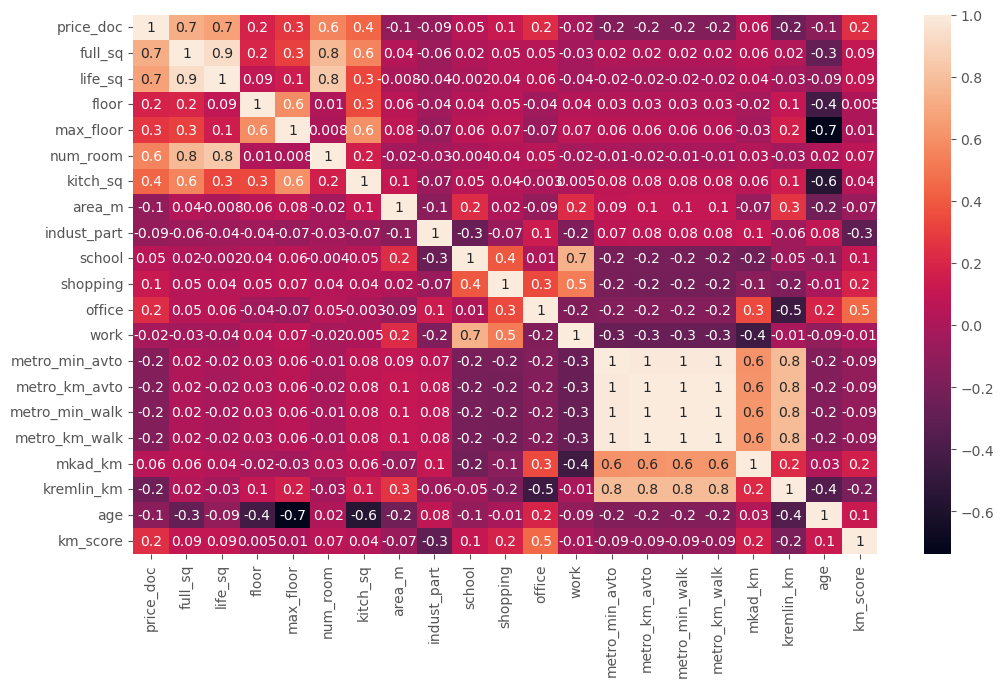

In [72]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

## 4.3. Average cost by district

Calculating the average cost of an apartment and sq. m. meters by area and then including it in our data.

In [73]:
# Grouping up by district and calc mean value
mean_by_distr = data[['sub_area', 'price_doc']].groupby('sub_area').agg('mean')

# Get it into dict
dict_distr = mean_by_distr['price_doc'].to_dict()

# And mapping it in
data['mean_distr_price'] = data['sub_area'].map(dict_distr)

In [74]:
# Grouping up same way + full_sq
mean_by_distr_sq = data[['sub_area', 'price_doc','full_sq']].groupby('sub_area').agg('mean')

# Calc mean price of 1 sq by district
mean_by_distr_sq['mean_price_of_sq'] = round(mean_by_distr_sq['price_doc'] / mean_by_distr_sq['full_sq'],2)

# Into dict
dict_sq = mean_by_distr_sq['mean_price_of_sq'].to_dict()

# Mapping it
data['mean_price_sq_by_disc'] = data['sub_area'].map(dict_sq)

mean_by_distr_sq


,price_doc,full_sq,mean_price_of_sq
sub_area,,,
Ajeroport,1.055793e+07,56.288462,187568.30
Akademicheskoe,1.196298e+07,59.266667,201850.06
Alekseevskoe,9.690882e+06,49.441176,196008.33
Altuf'evskoe,7.042593e+06,52.592593,133908.45
Arbat,1.121000e+07,50.400000,222420.63
...,...,...,...
Vostochnoe Izmajlovo,6.920088e+06,46.122807,150036.14
Vyhino-Zhulebino,7.247958e+06,49.290598,147045.45
Zapadnoe Degunino,8.020435e+06,53.739130,149247.57


In [75]:
data.drop(columns = 'sub_area', inplace=True)

In [76]:
pearsonr(data['price_doc'], data['mean_distr_price'])

PearsonRResult(statistic=0.49100415814868453, pvalue=0.0)

In [77]:
pearsonr(data['price_doc'], data['mean_price_sq_by_disc'])

PearsonRResult(statistic=0.4315191874824696, pvalue=0.0)

---
As you can see, both indicators are significant and have a fairly strong correlation with the resulting feature
___

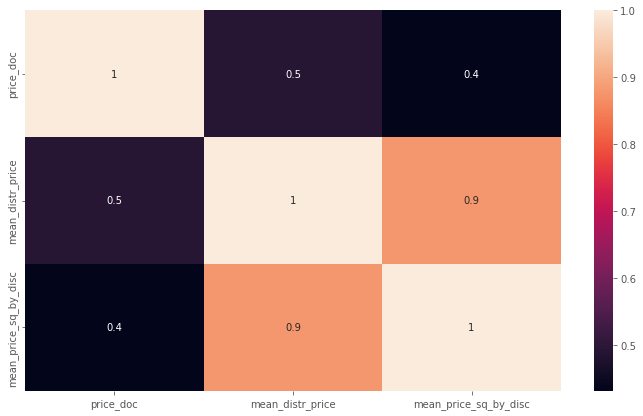

In [63]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc','mean_distr_price','mean_price_sq_by_disc']].corr(),annot = True, fmt='.1g')
plt.show()

However, as you can see - these signs have a strong correlation with each other - in this case, we exclude the average price per square meter - the correlation of the average price is higher.

Except we don't - mean sq price gonna be far more usefull, especially in long term, so we can sacrifice here a little.

In [78]:
data.drop(columns = 'mean_distr_price',inplace = True)

## 4.4. Parameters related to the transport system.

In [79]:
transp_factors = [ 'metro_km_walk',
 'mkad_km',
 'kremlin_km','metro_min_avto',
 'metro_km_avto',
 'metro_min_walk']

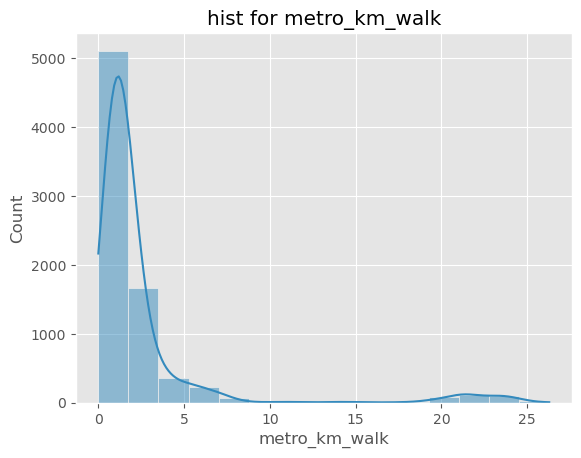

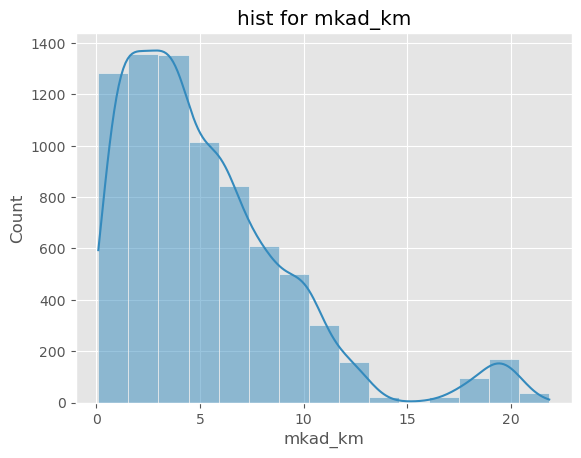

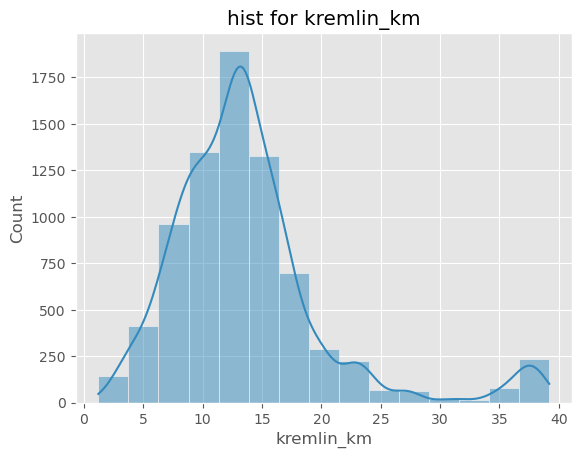

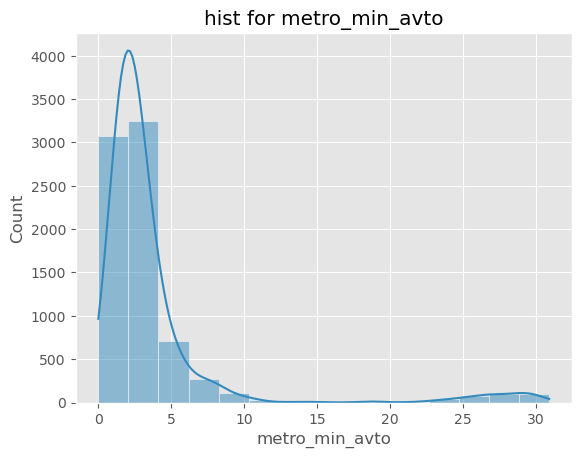

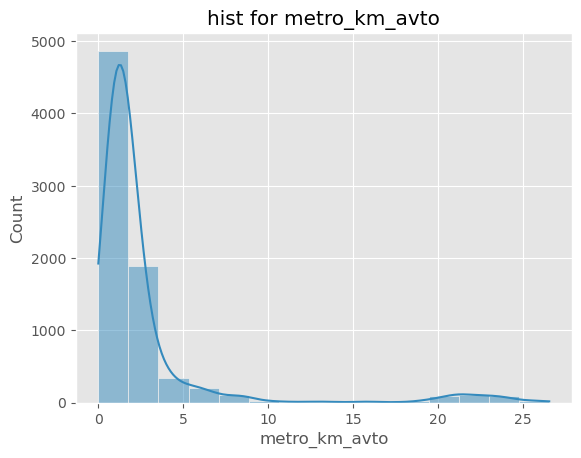

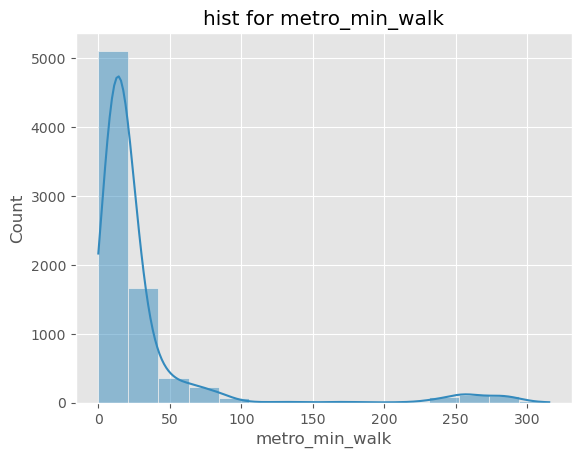

In [80]:
# Another load of histplots
for column in transp_factors:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist for {column}")
    plt.show()

In [81]:
for i in transp_factors:
    print(f'{i}:',pearsonr(data['price_doc'], data[i]))

metro_km_walk: PearsonRResult(statistic=-0.15996874096432917, pvalue=1.05566253348266e-45)
mkad_km: PearsonRResult(statistic=0.0560647622880014, pvalue=7.611695665776489e-07)
kremlin_km: PearsonRResult(statistic=-0.2415299979861258, pvalue=1.525862614600559e-103)
metro_min_avto: PearsonRResult(statistic=-0.15868024997491023, pvalue=5.465136780142946e-45)
metro_km_avto: PearsonRResult(statistic=-0.16346700294133382, pvalue=1.133465969160358e-47)
metro_min_walk: PearsonRResult(statistic=-0.15996874096661012, pvalue=1.055662530396806e-45)


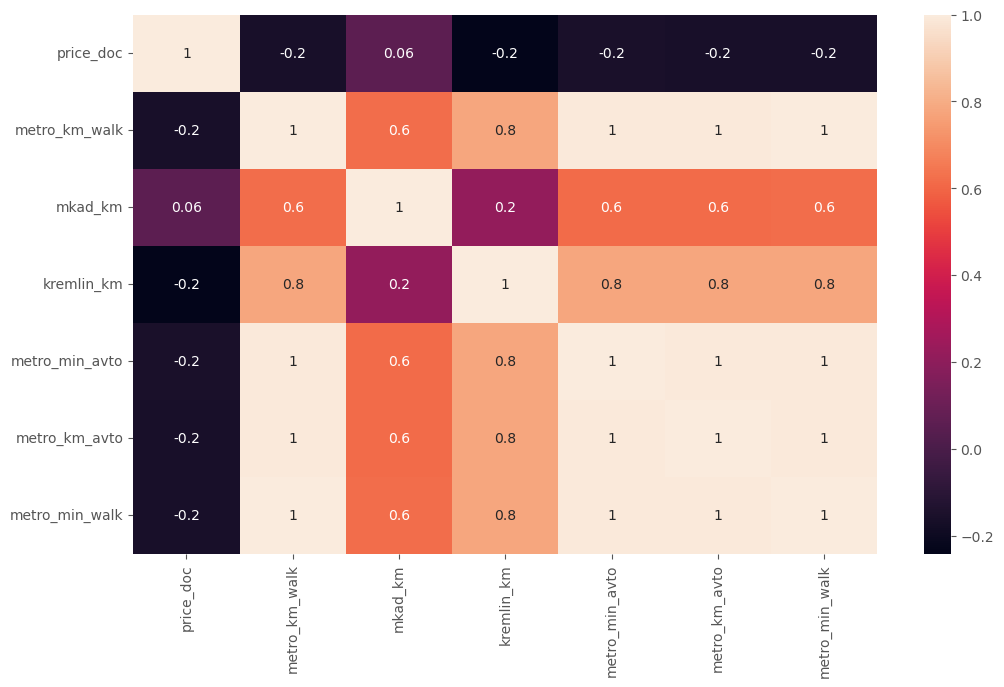

In [82]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[['price_doc',*transp_factors]].corr(),annot = True, fmt='.1g')
plt.show()

---
The factors strongly correlate with each other - it is worth removing most of them, and the distance indicators from the MKAD and the Kremlin very clearly show the location of the apartment
___

In [83]:
# List for removing
tr_remove = ['metro_min_avto',
 'metro_km_avto',
 'metro_min_walk','mkad_km',
 'metro_km_walk']

In [84]:
tr_stay = ['kremlin_km']

In [85]:
for i in tr_stay:
    Q1 = data[i].quantile(0.05)
    Q3 = data[i].quantile(0.95)

    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]


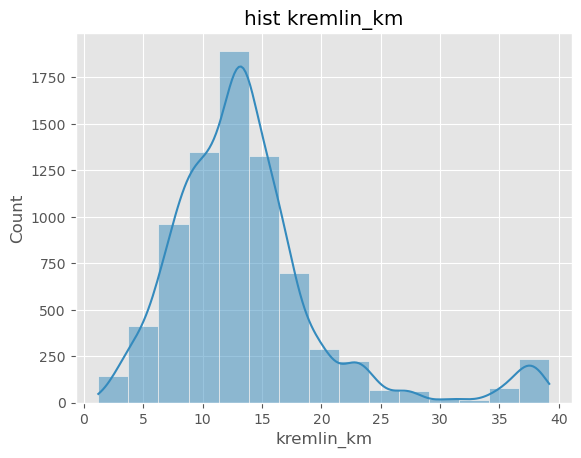

In [86]:
for column in tr_stay:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist {column}")
    plt.show()

The distribution is not perfect, but it is better than it was.
Deleting the rest of the data:

In [87]:
data.drop(columns = tr_remove, inplace=True)

# 4.5. Other factors

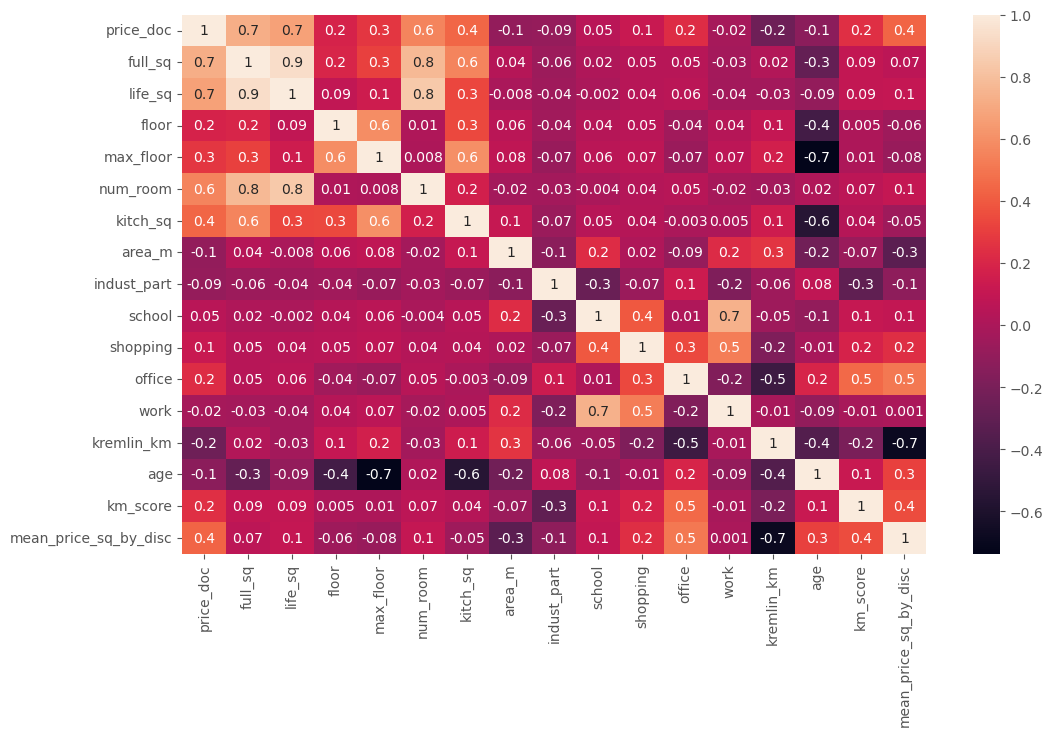

In [88]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

Note that life_sq,num_room,and kitch_sq create a strong multicollinearity with full_sq, and also do not give a lot of semantic load for price forecasting, especially since the methods of calculating these parameters are not always objective.

We exclude the remaining transport factor - in the full dataset it was found that it shows strong multicollinearity.

We also exclude floors and age, because they create multicollinearity between themselves and with max_floors, and the max_floors indicator can allow you to link the price with the age of buildings.

In [89]:
rem_l = ['life_sq','floor','num_room','age','kitch_sq','area_m','indust_part','school','work','kremlin_km']

In [90]:
data.drop(columns = rem_l, inplace=True)

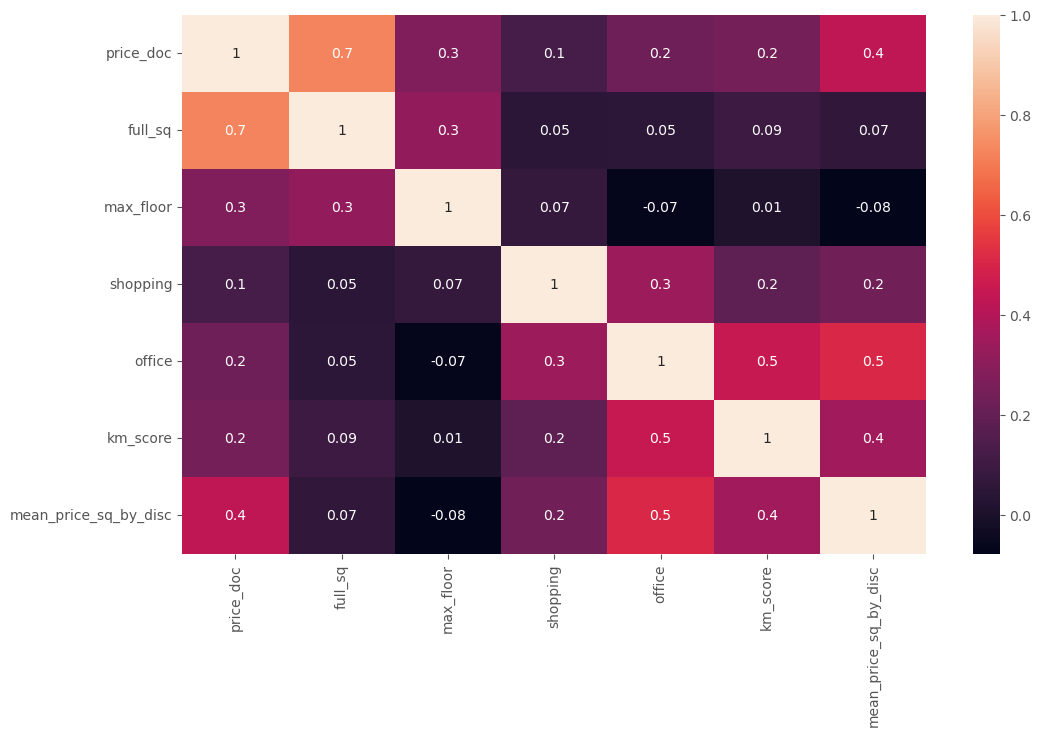

In [91]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

In [92]:
for i in ['price_doc','full_sq','max_floor','office','km_score','mean_price_sq_by_disc']:
    print(f'{i}:',pearsonr(data['price_doc'], data[i]))

price_doc: PearsonRResult(statistic=1.0, pvalue=0.0)
full_sq: PearsonRResult(statistic=0.72524823952961, pvalue=0.0)
max_floor: PearsonRResult(statistic=0.2683501905811233, pvalue=2.8986659111294603e-128)
office: PearsonRResult(statistic=0.2283309062813116, pvalue=1.907865781851559e-92)
km_score: PearsonRResult(statistic=0.24412694712002012, pvalue=8.282165580137341e-106)
mean_price_sq_by_disc: PearsonRResult(statistic=0.4315191874824696, pvalue=0.0)


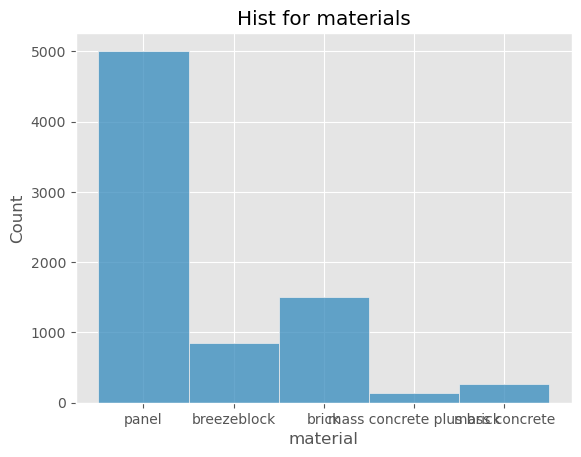

In [93]:
sns.histplot(data['material'],bins = 15)
plt.title("Hist for materials")
plt.show()

In [94]:
# Creating dummy-values for materials
material_dummies = pd.get_dummies(data['material']).astype(int)

# Dropping original column
data.drop(columns=['material'], inplace=True)

# Concatinating our datasets
data = pd.concat([data, material_dummies], axis=1)

In [95]:
data.head()

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel
0,5150000,38,14.0,5,1,7.626188e+06,143440.26,0,0,0,0,1
1,5980000,41,16.0,0,7,9.560290e+06,174151.66,0,0,0,0,1
2,4600000,41,14.0,4,1,6.520316e+06,120807.06,0,0,0,0,1
3,5650000,38,17.0,5,0,9.988493e+06,148005.90,0,0,0,0,1
4,9300000,58,9.0,5,1,7.689244e+06,156672.91,0,0,0,0,1


We create criteria for the cost of an apartment, the smallest - less than 33 quantiles, the average between 33 and 66, expensive 66+

In [96]:
quantile_33 = data['price_doc'].quantile(0.33)
quantile_66 = data['price_doc'].quantile(0.66)

In [97]:
quantile_33

6300000.0

In [98]:
quantile_66

8400000.0

In [99]:
data['low_prices'] = (data['price_doc'] < quantile_33).astype(int)

data['mid_prices'] = ((data['price_doc'] <= quantile_66) & (data['price_doc'] >= quantile_33)).astype(int)

data['high_prices'] = (data['price_doc'] > quantile_66).astype(int)

In [100]:
data

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel,low_prices,mid_prices,high_prices
0,5150000,38,14.0,5,1,7.626188e+06,143440.26,0,0,0,0,1,1,0,0
1,5980000,41,16.0,0,7,9.560290e+06,174151.66,0,0,0,0,1,1,0,0
2,4600000,41,14.0,4,1,6.520316e+06,120807.06,0,0,0,0,1,1,0,0
3,5650000,38,17.0,5,0,9.988493e+06,148005.90,0,0,0,0,1,1,0,0
4,9300000,58,9.0,5,1,7.689244e+06,156672.91,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8889,8300000,51,12.0,2,8,7.469152e+06,148523.63,1,0,0,0,0,0,1,0
8890,12800000,76,16.0,15,2,9.988493e+06,149346.88,0,0,0,0,1,0,0,1
8891,15500000,78,17.0,8,0,1.071755e+07,158895.89,0,0,0,0,1,0,0,1
8892,8350000,54,16.0,1,0,8.837689e+06,142956.49,1,0,0,0,0,0,1,0


The number of values in each of the columns

In [101]:
data.low_prices.value_counts()

0    5249
1    2521
Name: low_prices, dtype: int64

In [102]:
data.mid_prices.value_counts()

0    5113
1    2657
Name: mid_prices, dtype: int64

In [103]:
data.high_prices.value_counts()

0    5178
1    2592
Name: high_prices, dtype: int64

In [108]:
l = data.columns
l = l[0:7]

In [109]:
print(*l)

price_doc full_sq max_floor shopping office km_score mean_price_sq_by_disc


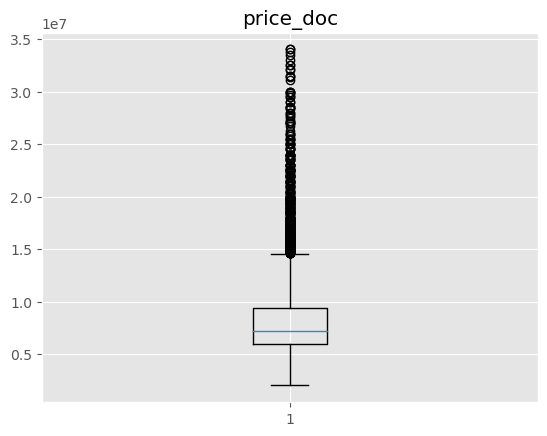

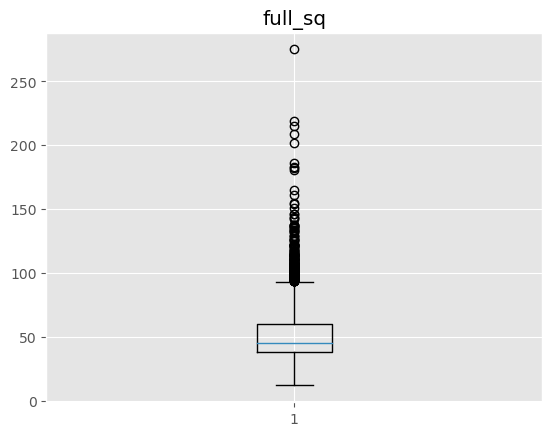

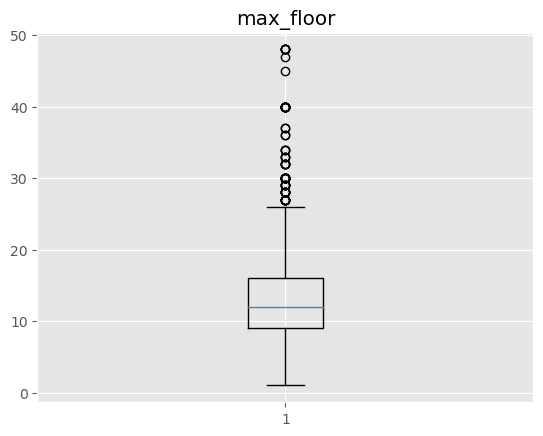

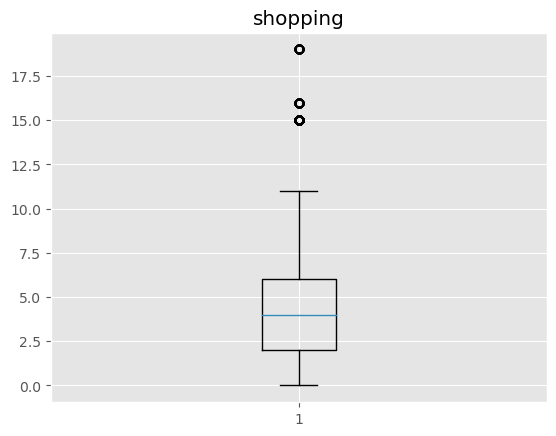

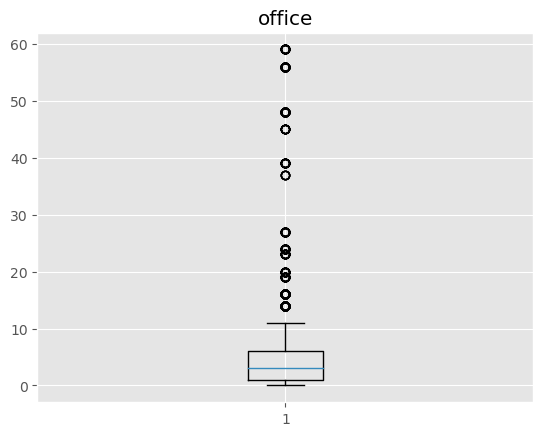

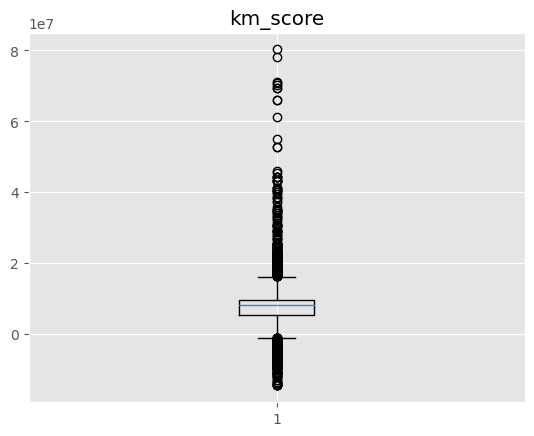

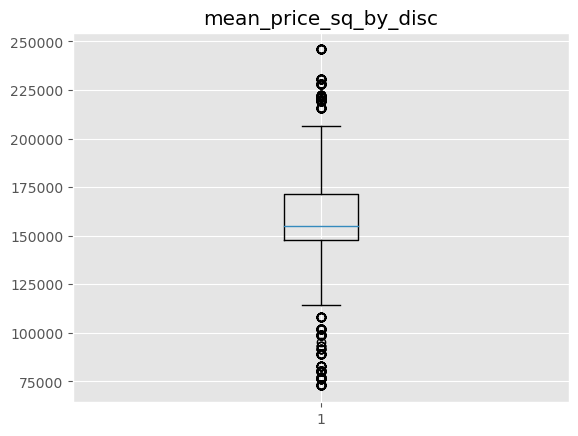

In [110]:
j = 0
for i in l:
    plt.figure(num=j)
    plt.boxplot(data[i])
    plt.title(i)
    j = j + 1

You may notice a large number of outliers, but we're not gonna exclude them, because then we will lose a lot of necessary data that simply do not fall into the main sample.

In [111]:
data.head()

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel,low_prices,mid_prices,high_prices
0,5150000,38,14.0,5,1,7.626188e+06,143440.26,0,0,0,0,1,1,0,0
1,5980000,41,16.0,0,7,9.560290e+06,174151.66,0,0,0,0,1,1,0,0
2,4600000,41,14.0,4,1,6.520316e+06,120807.06,0,0,0,0,1,1,0,0
3,5650000,38,17.0,5,0,9.988493e+06,148005.90,0,0,0,0,1,1,0,0
4,9300000,58,9.0,5,1,7.689244e+06,156672.91,0,0,0,0,1,0,0,1


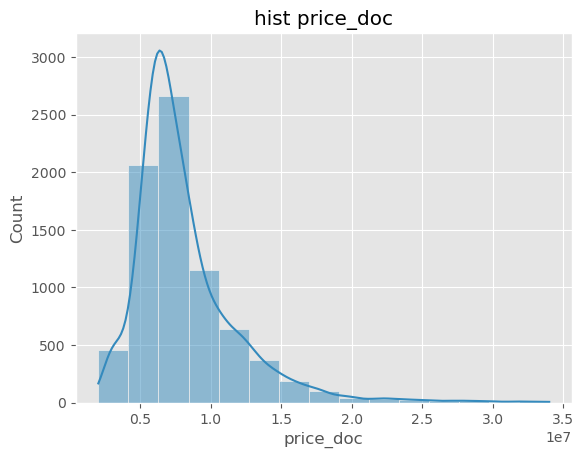

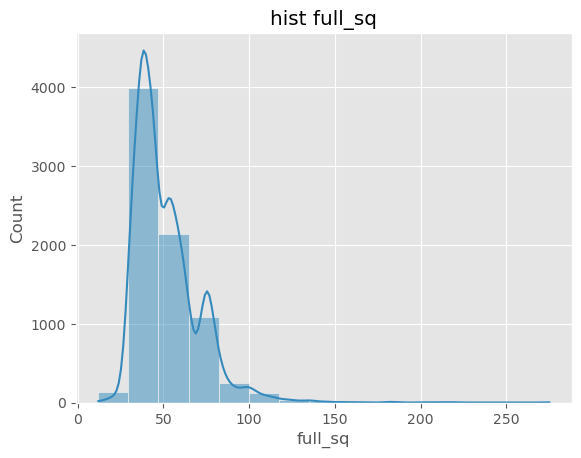

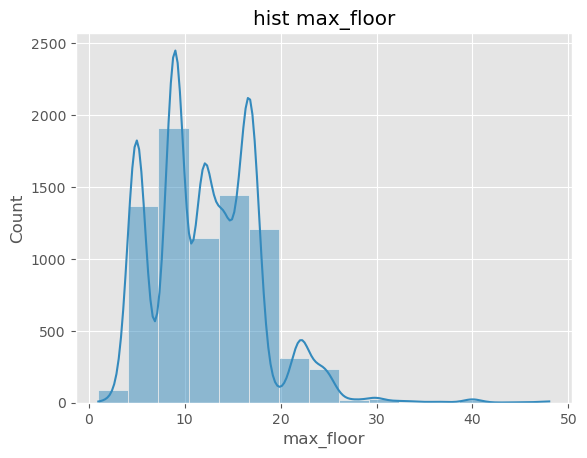

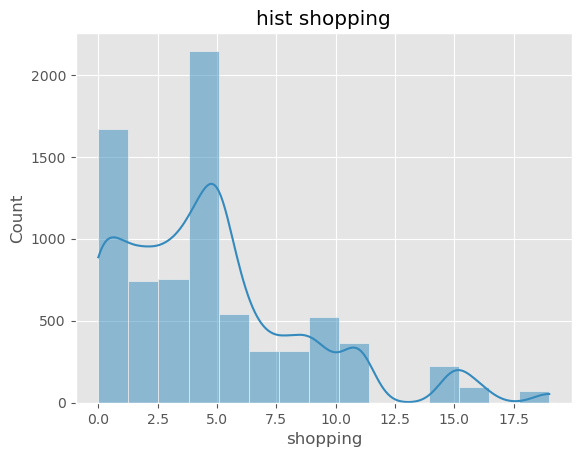

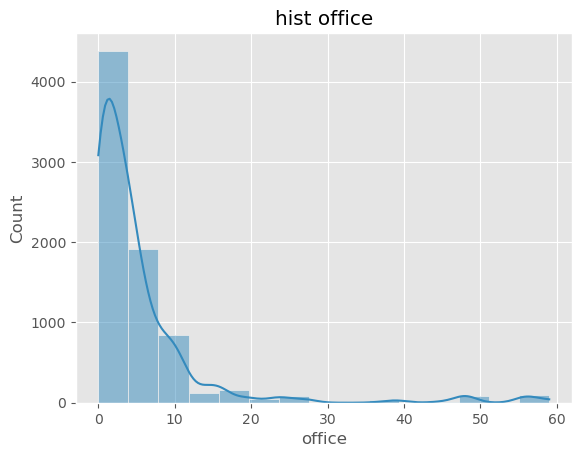

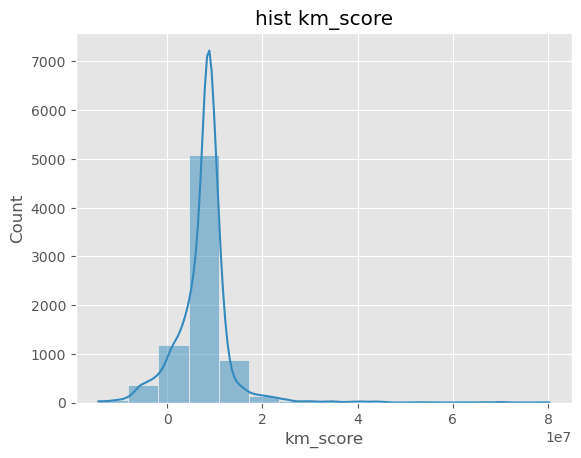

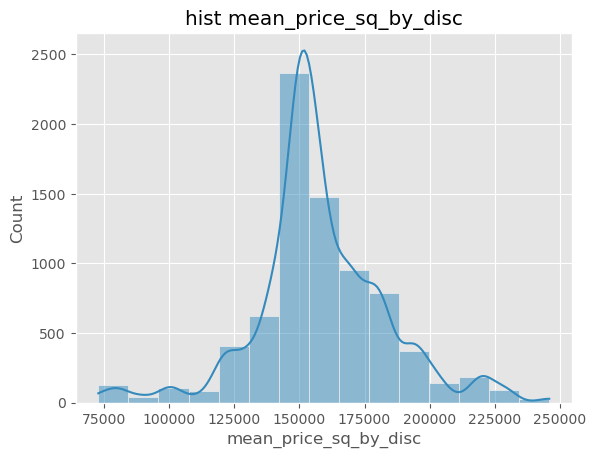

In [112]:
for column in l:
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"hist {column}")
    plt.show()

The data is distributed relatively (not)normal

# 5.1. Regression.

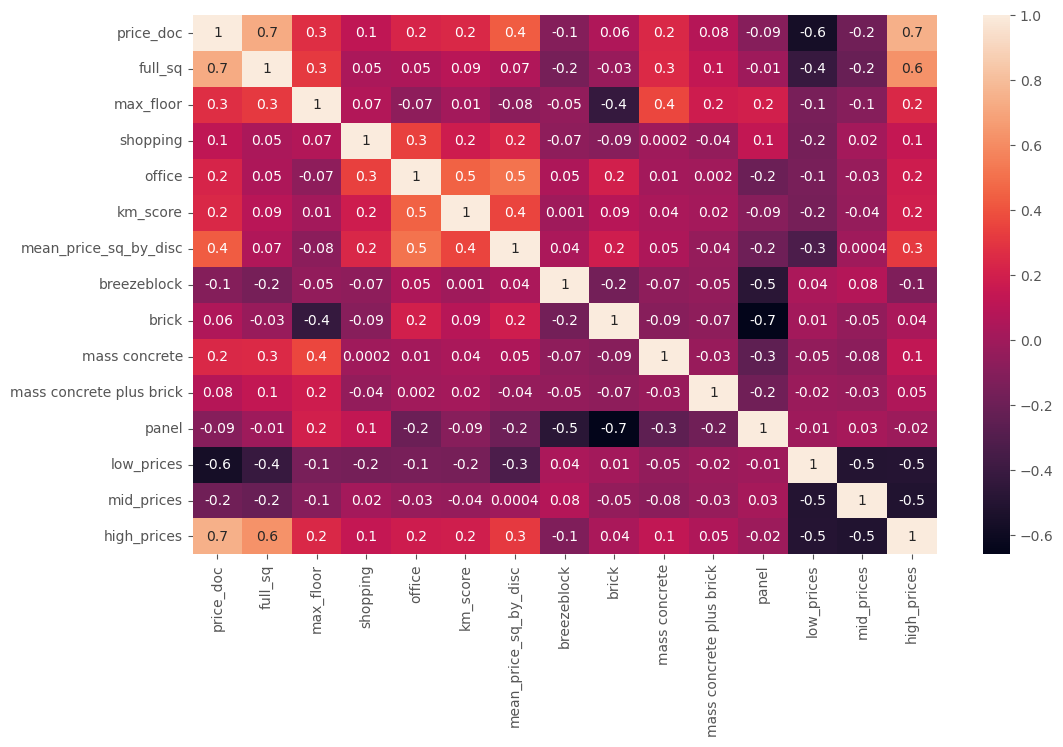

In [113]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(),annot = True, fmt='.1g')
plt.show()

In [114]:
data.head()

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel,low_prices,mid_prices,high_prices
0,5150000,38,14.0,5,1,7.626188e+06,143440.26,0,0,0,0,1,1,0,0
1,5980000,41,16.0,0,7,9.560290e+06,174151.66,0,0,0,0,1,1,0,0
2,4600000,41,14.0,4,1,6.520316e+06,120807.06,0,0,0,0,1,1,0,0
3,5650000,38,17.0,5,0,9.988493e+06,148005.90,0,0,0,0,1,1,0,0
4,9300000,58,9.0,5,1,7.689244e+06,156672.91,0,0,0,0,1,0,0,1


In [115]:
# Num of left rows
data.shape[0]

7770

In [119]:
# numeric cols
n_cols = ['price_doc','full_sq','max_floor','shopping','office','km_score','mean_price_sq_by_disc']

In [125]:
# nominative cols
o_cols = ['breezeblock','brick','mass concrete','mass concrete plus brick','panel','low_prices','mid_prices','high_prices']

Some standartising

In [121]:
ds_n = StandardScaler().fit_transform(data[n_cols])

In [122]:
ds_n = pd.DataFrame(ds_n, columns=n_cols)

In [123]:
round(ds_n.describe(),2)

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc
count,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00,7770.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.63,-2.10,-2.03,-1.22,-0.59,-3.73,-3.30
25%,-0.59,-0.72,-0.59,-0.72,-0.48,-0.37,-0.39
50%,-0.26,-0.34,-0.05,-0.21,-0.26,0.10,-0.12
75%,0.33,0.45,0.68,0.30,0.07,0.36,0.52
max,6.84,11.89,6.46,3.60,5.96,12.26,3.41


Let's combine it back with other values

In [126]:
model_stroy = pd.concat([ds_n.reset_index(drop=True), data[o_cols].reset_index(drop=True)], axis=1)

Let's check the values that NaN received during standardization.

In [127]:
model_stroy.isna().sum()

price_doc                   0
full_sq                     0
max_floor                   0
shopping                    0
office                      0
km_score                    0
mean_price_sq_by_disc       0
breezeblock                 0
brick                       0
mass concrete               0
mass concrete plus brick    0
panel                       0
low_prices                  0
mid_prices                  0
high_prices                 0
dtype: int64

In [128]:
ds = model_stroy.copy()

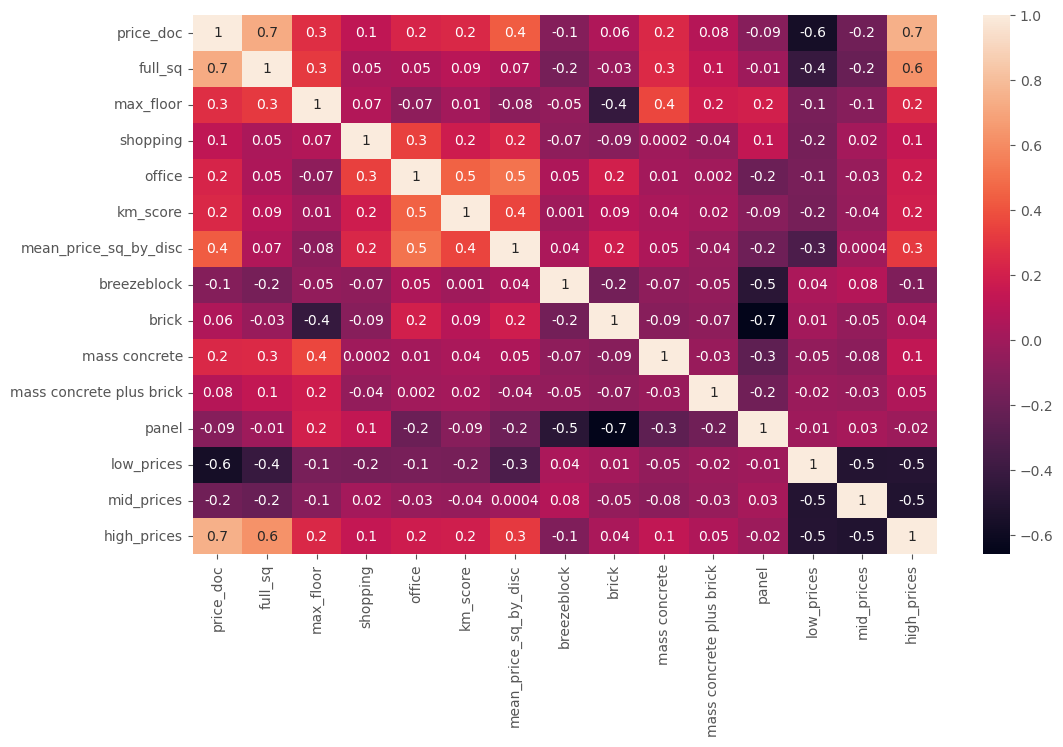

In [129]:
plt.figure(figsize=(12, 7))
sns.heatmap(ds.corr(),annot = True, fmt='.1g')
plt.show()

## 5.1.1. Regression №1

In [130]:
metric_4 = ds.columns

In [131]:
ds_1 = ds[metric_4]
ds_1.head()

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel,low_prices,mid_prices,high_prices
0,-0.798489,-0.716410,0.316215,0.045977,-0.483090,0.004690,-0.566602,0,0,0,0,1,1,0,0
1,-0.578735,-0.556850,0.677804,-1.223533,0.183073,0.330888,0.625313,0,0,0,0,1,1,0,0
2,-0.944109,-0.556850,0.316215,-0.207925,-0.483090,-0.181822,-1.445001,0,0,0,0,1,1,0,0
3,-0.666107,-0.716410,0.858598,0.045977,-0.594117,0.403107,-0.389409,0,0,0,0,1,1,0,0
4,0.300281,0.347321,-0.587756,0.045977,-0.483090,0.015324,-0.053040,0,0,0,0,1,0,0,1


In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_1.drop('price_doc', axis = 1), 
    ds_1['price_doc'], 
    test_size=0.3, 
    random_state=999)

In [133]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)
y_approx_1 = lin_reg.predict(X_train)
y_pred_1 = lin_reg.predict(X_test)

In [134]:
model = LinearRegression()

model.fit(X_train, y_train)

y_approx_1 = model.predict(X_train)
predictions = model.predict(X_test)
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  0.2670647400196361
mean_absolute_error :  0.3162486405010853


In [135]:
r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1))

r2_test_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_test_1))

R^2 on train: 0.77
R^2 on test: 0.74


In [136]:
X = sm.add_constant(np.array(X_train))
#X = np.array(X_train)

In [137]:
est = sm.OLS(y_train, X)
est2 = est.fit()
for i in range(len(metric_4)):
    print(f'{i}.{metric_4[i]}:{est2.params[i]}')
    
print(est2.summary())

0.price_doc:0.05196897613332219
1.full_sq:0.43863809654033137
2.max_floor:0.04473759789991806
3.shopping:-0.026652378154831024
4.office:-0.014574433679843062
5.km_score:0.04777190987839512
6.mean_price_sq_by_disc:0.25423942783768494
7.breezeblock:-0.09527448835688435
8.brick:-0.0021776080219669397
9.mass concrete:0.2308275273586104
10.mass concrete plus brick:0.02396285007760205
11.panel:-0.10536930492403915
12.low_prices:-0.40164442412359724
13.mid_prices:-0.08334603460994733
14.high_prices:0.5369594348668674
                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1508.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:05:44   Log-Likelihood:                -3703.5
No. Observ

Conclusions :
1. According to the F-criterion, the equation is significant.
2. Dummy variables are mostly significant
3. According to Harke-Beru - random residuals are not distributed normally, as it is expected.
4. According to Darbin-Watson, there is no autocorrelation
5. R^2 = 0.75. That is, the value of the variation of the 'price_doc' attribute is 75% explained by the variation of independent factors.

In [138]:
ds

,price_doc,full_sq,max_floor,shopping,office,km_score,mean_price_sq_by_disc,breezeblock,brick,mass concrete,mass concrete plus brick,panel,low_prices,mid_prices,high_prices
0,-0.798489,-0.716410,0.316215,0.045977,-0.483090,0.004690,-0.566602,0,0,0,0,1,1,0,0
1,-0.578735,-0.556850,0.677804,-1.223533,0.183073,0.330888,0.625313,0,0,0,0,1,1,0,0
2,-0.944109,-0.556850,0.316215,-0.207925,-0.483090,-0.181822,-1.445001,0,0,0,0,1,1,0,0
3,-0.666107,-0.716410,0.858598,0.045977,-0.594117,0.403107,-0.389409,0,0,0,0,1,1,0,0
4,0.300281,0.347321,-0.587756,0.045977,-0.483090,0.015324,-0.053040,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,0.035517,-0.024985,-0.045373,-0.715729,0.294100,-0.021795,-0.369316,1,0,0,0,0,0,1,0
7766,1.226955,1.304679,0.677804,2.584997,-0.372062,0.403107,-0.337365,0,0,0,0,1,0,0,1
7767,1.941818,1.411052,0.858598,0.807683,-0.594117,0.526066,0.033234,0,0,0,0,1,0,0,1
7768,0.048756,0.134575,0.677804,-0.969631,-0.594117,0.209017,-0.585377,1,0,0,0,0,0,1,0


## 5.1.2. Regression №2

In [148]:
metric_4 = ['price_doc', 
            'full_sq','km_score','mean_price_sq_by_disc','max_floor','shopping','breezeblock','mass concrete','panel','low_prices','mid_prices','high_prices']

In [149]:
ds_1 = ds[metric_4]
ds_1.head()

,price_doc,full_sq,km_score,mean_price_sq_by_disc,max_floor,shopping,breezeblock,mass concrete,panel,low_prices,mid_prices,high_prices
0,-0.798489,-0.716410,0.004690,-0.566602,0.316215,0.045977,0,0,1,1,0,0
1,-0.578735,-0.556850,0.330888,0.625313,0.677804,-1.223533,0,0,1,1,0,0
2,-0.944109,-0.556850,-0.181822,-1.445001,0.316215,-0.207925,0,0,1,1,0,0
3,-0.666107,-0.716410,0.403107,-0.389409,0.858598,0.045977,0,0,1,1,0,0
4,0.300281,0.347321,0.015324,-0.053040,-0.587756,0.045977,0,0,1,0,0,1


In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_1.drop('price_doc', axis = 1), 
    ds_1['price_doc'], 
    test_size=0.3, 
    random_state=99)

In [151]:
lin_reg = make_pipeline(StandardScaler(), LinearRegression())
lin_reg.fit(X_train, y_train)
y_approx_1 = lin_reg.predict(X_train)
y_pred_1 = lin_reg.predict(X_test)

In [152]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

print('MAE on train:{:.2f}'.format(mean_absolute_error(y_train, y_approx_1))) 

mse_approx_1 = mean_squared_error(y_train, y_approx_1)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on train: {:.2%}'.format(mape_test_1))

print('MAE on test:{:.2f}'.format(mean_absolute_error(y_test, y_pred_1)))

mse_test_1 = mean_squared_error(y_test, y_pred_1)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_test_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_test_1))

MAPE on train: 124.92%
MAE on train:0.31
MSE on train: 0.24
R^2 on train: 0.76 

MAPE on train: 122.63%
MAE on test:0.31
MSE on test: 0.24
R^2 on test: 0.76


In [153]:
X = sm.add_constant(np.array(X_train))
#X = np.array(X_train)

In [154]:
model = LinearRegression()

model.fit(X_train, y_train)

y_approx_1 = model.predict(X_train)
predictions = model.predict(X_test)


In [155]:
X = sm.add_constant(np.array(X_train))
est = sm.OLS(y_train, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1712.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:11:50   Log-Likelihood:                -3843.0
No. Observations:                5439   AIC:                             7708.
Df Residuals:                    5428   BIC:                             7781.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0349      0.012      2.951      0.0

In [156]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1712.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:11:54   Log-Likelihood:                -3843.0
No. Observations:                5439   AIC:                             7708.
Df Residuals:                    5428   BIC:                             7781.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
full_sq                   0.42

The conclusions are similar to the previous model, but all parameters are significant and R^2 is now 0.759, 

that is, the value of the variation of the 'price_doc' attribute by 75.9% is explained by the variation of independent factors.

## 5.1.3. Lasso

In [157]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_approx_1 = lasso.predict(X_train)
y_pred_1 = lasso.predict(X_test)

In [158]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_1)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_1)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 100.31%
MSE on train: 1.00
R^2 on train: 0.0 

MAPE on test: 100.38%
MSE on test: 1.00
R^2 on test: -0.00031


---
Negative R^2 tells us everything we need to know about this model - it is absolutely not worth using it.
At the same time, MAPE decreased by almost 30-60 percent, not bad.
___

## 5.1.3. Ridge

In [159]:
ridge = Ridge()

ridge.fit(X_train, y_train)

y_approx_3 = ridge.predict(X_train)
y_pred_3 = ridge.predict(X_test)

In [160]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_3)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_3)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_3)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_3)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_3)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_3)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 124.87%
MSE on train: 0.24
R^2 on train: 0.76 

MAPE on test: 122.58%
MSE on test: 0.24
R^2 on test: 0.76


---
The model shows similar values with the usual regression.
___

# 5.2. Validation.

## 5.2.1. V-Lasso

In [161]:
cv = KFold(n_splits=4, shuffle=False, random_state=None)

In [162]:
grid = {'alpha': np.linspace(0.1, 1, 20)}

In [163]:
gs_lasso = GridSearchCV(Lasso(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [164]:
gs_lasso.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [165]:
a = gs_lasso.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 0.1


In [166]:
mape_train_best_lasso = mean_absolute_percentage_error(y_train, gs_lasso.best_estimator_.predict(X_train))
mse_train_best_lasso = mean_squared_error(y_train, gs_lasso.best_estimator_.predict(X_train))
mae_train_best_lasso = mean_absolute_error(y_train, gs_lasso.best_estimator_.predict(X_train))

mape_test_best_lasso = mean_absolute_percentage_error(y_test, gs_lasso.best_estimator_.predict(X_test))
mse_test_best_lasso = mean_squared_error(y_test, gs_lasso.best_estimator_.predict(X_test))
mae_test_best_lasso = mean_absolute_error(y_test, gs_lasso.best_estimator_.predict(X_test))

print('MAPE on train: {:.2%}'.format(mape_train_best_lasso))
print('MSE on train: {:.2f}'.format(mse_train_best_lasso))
print('MAE on train:', mae_train_best_lasso,'\n') 

print(f'R^2 = {round(gs_lasso.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MAE on train:', mae_test_best_lasso) 

MAPE on train: 112.14%
MSE on train: 0.31
MAE on train: 0.3188375293025277 

R^2 = 0.6869 

MAPE on test: 108.65%
MSE on test: 0.32
MSE on test: 0.32
MAE on train: 0.3235553206627799


In [167]:
for i, col in enumerate(X_train.columns):
    print(f'{col}: {round(gs_lasso.best_estimator_.coef_[i], 2)}')

full_sq: 0.54
km_score: 0.0
mean_price_sq_by_disc: 0.26
max_floor: 0.0
shopping: 0.0
breezeblock: -0.0
mass concrete: 0.0
panel: -0.0
low_prices: -0.0
mid_prices: -0.0
high_prices: 0.23


Conclusions:
* When validating with a lasso, the results are noticeably better than the usual lasso model.

- Validation that with the value of aplha, as the best option = 0.1, gives factors affecting the price of housing:
    * The area of the apartment
    * Average price per square meter in the area
    * Is the apartment expensive

R^2 = 0.6869. This suggests that the model explains 68.69% of the variation of the feature-result.

## 5.2.2. V-Ridge

In [168]:
gs_ridge = GridSearchCV(Ridge(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [169]:
gs_ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [170]:
a = gs_ridge.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 1.0


In [171]:
for i, col in enumerate(X_train.columns):
    print(col, gs_ridge.best_estimator_.coef_[i])

full_sq 0.4268882137361738
km_score 0.031838279825860114
mean_price_sq_by_disc 0.25000103592876055
max_floor 0.051141403214647205
shopping -0.027036060879078203
breezeblock -0.08547087364614495
mass concrete 0.284701819385191
panel -0.08083971142904328
low_prices -0.41928089160316756
mid_prices -0.09821519537750852
high_prices 0.5174960869820658


In [172]:
mape_train_best_ridge = mean_absolute_percentage_error(y_train, gs_ridge.best_estimator_.predict(X_train))
mse_train_best_ridge = mean_squared_error(y_train, gs_ridge.best_estimator_.predict(X_train))
mae_train_best_ridge = mean_absolute_error(y_train, gs_ridge.best_estimator_.predict(X_train))

mape_test_best_ridge = mean_absolute_percentage_error(y_test, gs_ridge.best_estimator_.predict(X_test))
mse_test_best_ridge = mean_squared_error(y_test, gs_ridge.best_estimator_.predict(X_test))
mae_test_best_ridge = mean_absolute_error(y_test, gs_ridge.best_estimator_.predict(X_test))

print('MAPE on train: {:.2%}'.format(mape_train_best_ridge))
print('MSE on train: {:.2f}'.format(mse_train_best_ridge))
print('MAE on train: {:.2f}'.format(mae_train_best_ridge),'\n') 

print(f'R^2 = {round(gs_ridge.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ridge))
print('MSE on test: {:.2f}'.format(mse_test_best_ridge))
print('MAE on test: {:.2f}'.format(mae_test_best_ridge))

MAPE on train: 124.87%
MSE on train: 0.24
MAE on train: 0.31 

R^2 = 0.7571 

MAPE on test: 122.58%
MSE on test: 0.24
MAE on test: 0.31


Conclusions:
* Ridge validation results are similar to the linear regression model. The data has not changed at all, R^2 a little.

* R^2 = 0.7571. This suggests that the model can explain 75.71% of the variation of the trait-result.

## 5.2.3 L1+L2

In [173]:
grid_combo = {'alpha': np.linspace(0.1, 1, 20),
        'l1_ratio':np.linspace(0.1, 1, 20)}

In [174]:
gs_ElasticNet = GridSearchCV(ElasticNet(), 
                  grid_combo, 
                  n_jobs=-1,
                  cv=cv) 

In [175]:
gs_ElasticNet.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
                         'l1_ratio': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [176]:
a, b = gs_ElasticNet.best_params_['alpha'], gs_ElasticNet.best_params_['l1_ratio']
print(f'best alpha = {a}')
print(f'best l1 ratio = {b}')

best alpha = 0.1
best l1 ratio = 0.1


In [177]:
for i, col in enumerate(X_train.columns):
    print(col, gs_ElasticNet.best_estimator_.coef_[i])

full_sq 0.46224328212724136
km_score 0.037349855904704264
mean_price_sq_by_disc 0.2595471081420873
max_floor 0.06879519085572516
shopping -0.003835364233521511
breezeblock -0.0
mass concrete 0.007263612146075018
panel -0.03479662281514191
low_prices -0.2516244642508824
mid_prices -0.02396968866209498
high_prices 0.3867147700106725


In [178]:
print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}')

R^2 = 0.7435


In [179]:
mape_train_best_ElasticNet = mean_absolute_percentage_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train))
mse_train_best_ElasticNet = mean_squared_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train))

mape_test_best_ElasticNet = mean_absolute_percentage_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test))
mse_test_best_ElasticNet = mean_squared_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test))


print('MAPE on train: {:.2%}'.format(mape_train_best_ElasticNet))
print('MSE on train: {:.2f}'.format(mse_train_best_ElasticNet),'\n')

print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ElasticNet))
print('MSE on test: {:.2f}'.format(mse_test_best_ElasticNet))

MAPE on train: 107.22%
MSE on train: 0.25 

R^2 = 0.7435

MAPE on test: 105.33%
MSE on test: 0.26


Conclusions:
* * The best coefficients of alpha and l1 ratio are equal to 0.1
* All coefficients are important.
* MAPE has improved by several tens of percent.
* R^2 = 0.7435. The 74.35% model explains the variation of the feature-result.

# 5.3. The polynomial model

### 5.3.1 POLYNOM

In [180]:
reg = ds[metric_4]

In [181]:
X = reg.drop(columns=['price_doc']) 
y = reg['price_doc'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


degree = 2  
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_approx_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_approx_train)
print('MSE on train: {:.2f}'.format(mse_train))

r2_train = r2_score(y_train, y_approx_train)
print('R^2 on train: {:.2f}'.format(r2_train))


mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on test: {:.2f}'.format(mse_test))

r2_test = r2_score(y_test, y_pred_test)
print('R^2 on test: {:.2f}'.format(r2_test))


MSE on train: 0.14
R^2 on train: 0.86
MSE on test: 0.12
R^2 on test: 0.88


---
Output: 
* The polynomial model better explains the variation in house prices, 88%, having less MSE than for the linear regression model
___

### 5.3.2 V-Poly

In [182]:
cv = KFold(n_splits=4, shuffle=True, random_state=99)

In [183]:
poly = make_pipeline(StandardScaler(), PolynomialFeatures(),  LinearRegression())

In [184]:
poly.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('polynomialfeatures', PolynomialFeatures()),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': 'deprecated',
 'linearregression__positive': False}

In [185]:
grid = {'polynomialfeatures__degree': [1, 2, 3]}

In [186]:
gs = GridSearchCV(poly, 
                  grid, 
                  n_jobs=-1,
                  #scoring="neg_mean_absolute_percentage_error",
                  cv=cv)

In [187]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=99, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': [1, 2, 3]})

In [188]:
gs.best_params_

{'polynomialfeatures__degree': 2}

In [189]:
y_approx_1 = gs.predict(X_train)
y_pred_1 = gs.predict(X_test)

In [190]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_1)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1))


mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on test: {:.2%}'.format(mape_test_1))

mse_test_1 = mean_squared_error(y_test, y_pred_1)
print('MSE on test: {:.2f}'.format(mse_test_1))

r2_test_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_test_1))

MAPE on train: 105.34%
MSE on train: 0.14
R^2 on train: 0.86
MAPE on test: 88.20%
MSE on test: 0.11
R^2 on test: 0.88


Conclusions: 

* According to the Validation, the best degree for the polynomial model = 2. 

* At the same time, compared with linear regression, there is less MAPE, MSE.
---
And R^2 is an insane 88%

Success!
___

# Results

---
The best model for this sample should be considered a polynomial of degree 2, with a staggering 88% variation and good indicators for MAO, MSE, MAPE.
---
It is worth using the usual linear regression / ridge regression, they have the same results, R^2 = 77%.
---
In extreme cases, there is a combined L1 and L2, lower error values than the subsequent ones, and a good R^2 in ~ 75%.
---
Forget about the Lasso.
---